## Problem Statement

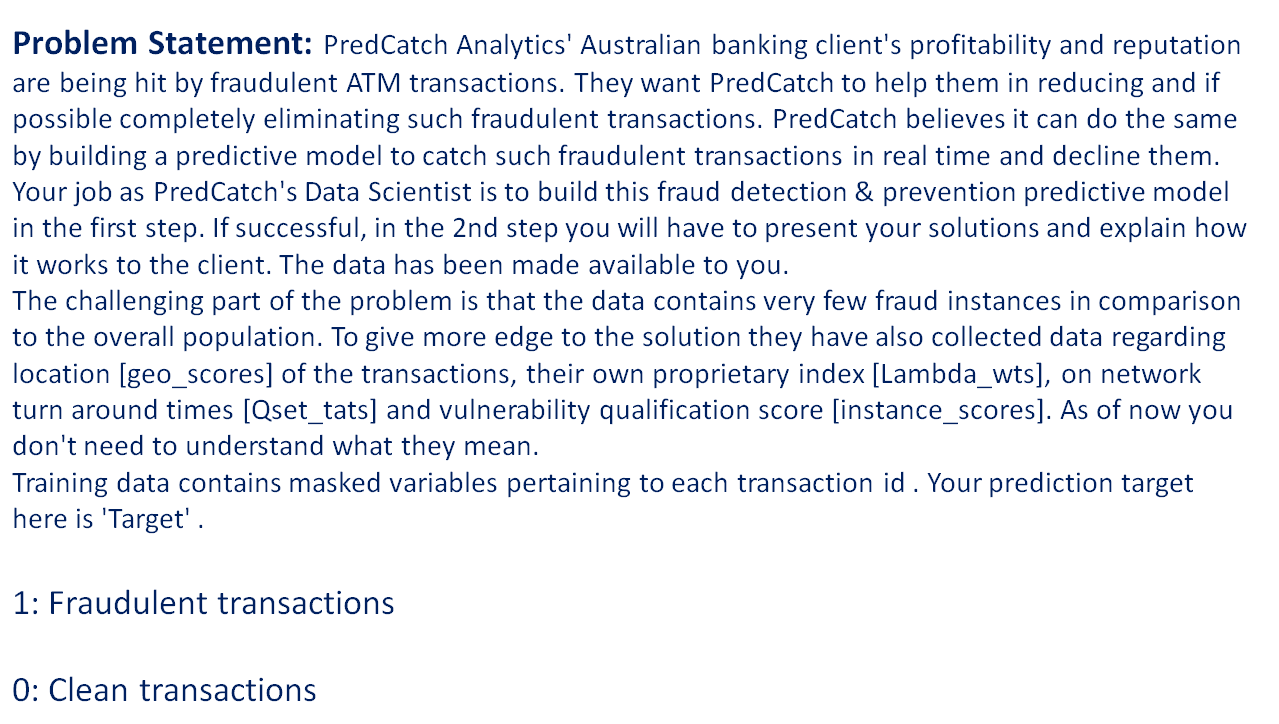

## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score , roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

#### Datasets

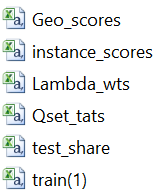

### Import Datasets

In [2]:
geo = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Geo_scores.csv')
instance = pd.read_csv(r'C:\Users\Lenovo\Downloads\\instance_scores.csv')
lambdawts = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Lambda_wts.csv')
qset = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Qset_tats.csv')
test = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\test_share.csv')
train = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\train(1).csv')

#### Shape

In [3]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape) # groups means organisation
print()
print(qset.shape)
print()
print(test.shape)
print()
print(train.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


#### You need to merge whole data then we will go further but here we have columns are not ame as well as shape is different

In [4]:
print(geo.columns.unique())
print()
print(instance.columns.unique())
print()
print(lambdawts.columns.unique()) 
print()
print(qset.columns.unique())
print()
print(test.columns.unique())
print()
print(train.columns.unique())

Index(['id', 'geo_score'], dtype='object')

Index(['id', 'instance_scores'], dtype='object')

Index(['Group', 'lambda_wt'], dtype='object')

Index(['id', 'qsets_normalized_tat'], dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')


#### Insights : we have  every dataset have ID column except lambda . so we need to check unique value on id column and group column as well because group column is common in  lambdawts , train and test  

In [5]:
print('Geo id :' ,geo['id'].nunique())
print()
print('instance id :',instance['id'].nunique())
print()
print('qset id :',qset['id'].nunique())
print()
print('test id :' ,test['id'].nunique())
print()
print('train id' ,train['id'].nunique())
print()
print('lambdawts group :',lambdawts['Group'].nunique())
print()
print('test group :' ,test['Group'].nunique())
print()
print('train group' ,train['Group'].nunique())

Geo id : 284807

instance id : 284807

qset id : 284807

test id : 56962

train id 227845

lambdawts group : 1400

test group : 915

train group 1301


#### Insights : we get to know in geo data  , there are 284807 customers are unique and in instance data has 284807 customers are unique and qset has 284807 unique data but train and test data have not get it same value as like others so we sum of train and test data then we can get it
  


#### For understanding of train and test data we make one columns in train and test by name of 'Data' . in that data we put train or test keyword

In [6]:
train['Data'] ='train'
test['Data'] = 'test'

In [7]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'Data'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Data'],
      dtype='object')

##### We concat train and test data

In [9]:
df = pd.concat([train , test] , axis = 0 )

In [10]:
df.shape

(284807, 29)

In [11]:
df.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train


In [12]:
df.tail(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.315,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.450,NaN,test


In [13]:
df.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'Data'],
      dtype='object')

In [14]:
print('dataframe id :' , df['id'].nunique())
print()
print('dataframe group :' , df['Group'].nunique())

dataframe id : 284807

dataframe group : 1400


#### Insights : After merging train and test we get id  284807 . actually in which data we have id it has same length like geo , instance , qset , df(train and test) has same len of id is  284807 . and in lambdawts we don't have id there is group which is availabel in train and test but its count is different so initially we are not merging  . we merge train and test for id then we get exact same id len as compare to others and exact same Group columns length(lambdawts) as compare to df(train and test) 

##### Check null values

In [15]:
print(geo.isnull().sum())
print()
print(instance.isnull().sum())
print()
print(lambdawts.isnull().sum()) 
print()
print(qset.isnull().sum())
print()
print(df.isnull().sum())

id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
Data                  0
dtype: int64


#### Insights : we get missing values in geo and qset . we also get missing values in target but its due concatenation because we concat train and test there train contains target column only but test has not target column so thats why it came

#### Describe

In [16]:
print(geo.describe())
print()
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


#### Skewness

In [17]:
print(geo.skew())

id          -7.075998e-19
geo_score   -1.226863e-01
dtype: float64


In [18]:
print(qset.skew())

id                     -8.086855e-20
qsets_normalized_tat   -1.525004e-01
dtype: float64


#### Both data is not in normal distribution so we can impute by median also

In [19]:
qset['qsets_normalized_tat'].isnull().sum()

103201

In [20]:
geo['geo_score'].isnull().sum()

71543

#### Impute missing values by median only

In [21]:
geo['geo_score'].median()

0.18

In [22]:
geo['geo_score'].fillna(geo['geo_score'].median() , inplace = True)

In [23]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [24]:
qset['qsets_normalized_tat'].median()

0.0199999999999997

In [25]:
qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median() , inplace = True)

In [26]:
qset.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [27]:
geo.shape

(1424035, 2)

#### Unique value of geo id

In [28]:
geo['id'].nunique()

284807

#### Here we take mean of id of geo instead id of geo

In [29]:
geo['id'].head(2)

0     26674
1    204314
Name: id, dtype: int64

In [30]:
len(list(geo.groupby(geo['id'])))

284807

##### Groupby is make duplicat data into non duplicate (unique) data

In [31]:
geo.shape

(1424035, 2)

In [32]:
geo.head(2)

,id,geo_score
0,26674,4.48
1,204314,4.48


##### Groupby makes duplicate to non duplicate(unique) data and mean make  average of that id (how many times repeated like if id 1 is repeated 10 times and geo score is like evry time like 1 ,2 ,3 , 4 , 5 ,6 ,7 ,8 , 9 , 10 then  groupby id means 10 times id is get in 1 only and average of 10 times score like(10+9+8+7+6+5+4+3+2+1) / 10)

In [33]:
geo = geo.groupby(geo['id']).mean()

In [34]:
geo.shape

(284807, 1)

In [35]:
geo.head(2)

,geo_score
id,
0,-0.620
1,1.106


#### Insights : We just make geo id data from duplicate to non duplicate by groupby and take score of id and make it mean and id column became index here

In [36]:
qset.shape

(1424035, 2)

In [37]:
qset['id'].nunique()

284807

In [38]:
qset = qset.groupby(qset['id']).mean()

In [39]:
qset.shape

(284807, 1)

In [40]:
qset.head(2)

,qsets_normalized_tat
id,
0,0.214
1,-0.110


##### So here we make again qset from 1424035 to 284807. by groupby we make duplicates to non duplicates and by mean it take average of qsets_normalized_tat

In [41]:
qset.head(2)

,qsets_normalized_tat
id,
0,0.214
1,-0.110


In [42]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape) # groups means organisation
print()
print(qset.shape)
print()
print(df.shape)
print()

(284807, 1)

(1424035, 2)

(1400, 2)

(284807, 1)

(284807, 29)



#### Instance  is the only not same shape so we make as same shape

In [43]:
instance.shape

(1424035, 2)

In [44]:
instance = instance.groupby(instance['id']).mean()

In [45]:
instance.shape

(284807, 1)

In [46]:
instance.head(2)

,instance_scores
id,
0,0.09
1,-0.17


##### Insights : we make here instance from 1424035 to 284807.

In [47]:
lambdawts.shape

(1400, 2)

In [48]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape) # groups means organisation
print()
print(qset.shape)
print()
print(df.shape)
print()

(284807, 1)

(284807, 1)

(1400, 2)

(284807, 1)

(284807, 29)



In [49]:
train['Group'].shape

(227845,)

In [50]:
test['Group'].shape

(56962,)

#### whatever we doing till now just to make data into unique id like 284807 from 1424035 means we just make unique id and its average score of geo , instance , qset 
#### In  groupby we have 1400 unique groupby so we just make 1400 unique groupby by combine train and test . because in lambdawts we have unique value of groupby so we can merge with df(train and test only) so we need make both df(train and test)[groupby] is same as to lambdawts[groupby].

# Day - 2

#### Here we just make four different dataset get merge it . those have same count of records like  geo , instance , qset , df. and we are not merging lambdawts right now

#### Merge geo in df

In [51]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train


In [52]:
df.shape

(284807, 29)

In [53]:
df = pd.merge(df , geo , how = 'left' , on = 'id')

In [54]:
df.shape

(284807, 30)

In [55]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256


##### Insights : Here we perfrom merge on left join means here all date come from df and from geo it matches / join only that id which is present in geo only.
##### i.e. means if same id in df and that same id in geo then it merge and put geo value in new column.
##### if id in df and id in geo is not same then it mention null value at geo column but its not make issue here becuase we have same count of both different data

#### Merge instance in df

In [56]:
df.shape

(284807, 30)

In [57]:
df = pd.merge(df , instance , on = 'id' , how = 'left')

In [58]:
df.shape

(284807, 31)

In [59]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06


#### Merge Qset in df

In [60]:
df.shape

(284807, 31)

In [61]:
df = pd.merge(df , qset , on = 'id' , how = 'left')

In [62]:
df.shape

(284807, 32)

In [63]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.7


#### Merge lamdawts with df on basis of group column

In [64]:
lambdawts['Group'].nunique()

1400

In [65]:
df['Group'].nunique()

1400

##### In df there are 2,84,807 customers are there and this customers are belongs to this 1400 organisations . so there are definately possiobility of one organisation have multiple customers so thats why group is repeated in df . 

##### Both have same no. of unique count so we can merge them on basis of group(common) column

In [66]:
df.shape

(284807, 32)

In [67]:
df = pd.merge(df , lambdawts , on = 'Group' , how = 'left')

In [68]:
df.shape

(284807, 33)

##### I just check is there any null value after the merging in geo , instance , qset , lambdawts

In [69]:
df.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
Data                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

##### Insights : Here whatever we perfrom EDA / Data Preprocessing till now for just make data combine and make on dataset for model building here we concat train and test and make df and then we merge geo ,insatnce , qset by making equal count wrt df ( by groupby(df[col].mean())) and then we merge lambdawts with df on basis of groupby by unique count.   

#### Split data train and test data

In [70]:
train_df = df[df['Data'] == 'train']

In [71]:
test_df = df[df['Data'] == 'test']

In [72]:
train_df.shape

(227845, 33)

In [73]:
test_df.shape

(56962, 33)

In [74]:
train_df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,...,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.7,-0.13


In [75]:
test_df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.3,1.54,0.22,-0.28,0.57,0.26,0.7,1.076667,...,0.796667,0.823333,0.783333,-249.75,NaN,test,0.25,-0.04,-0.426,0.76


In [76]:
train_df.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'Data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [77]:
test_df.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'Data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

##### Make Train and test data clean

In [78]:
train_df.drop(['Data'] , axis = 1 , inplace = True)

In [79]:
test_df.drop([ 'Target', 'Data'] , axis = 1 ,inplace = True)

#### split data into independent and dependent variable

### Check Correlation

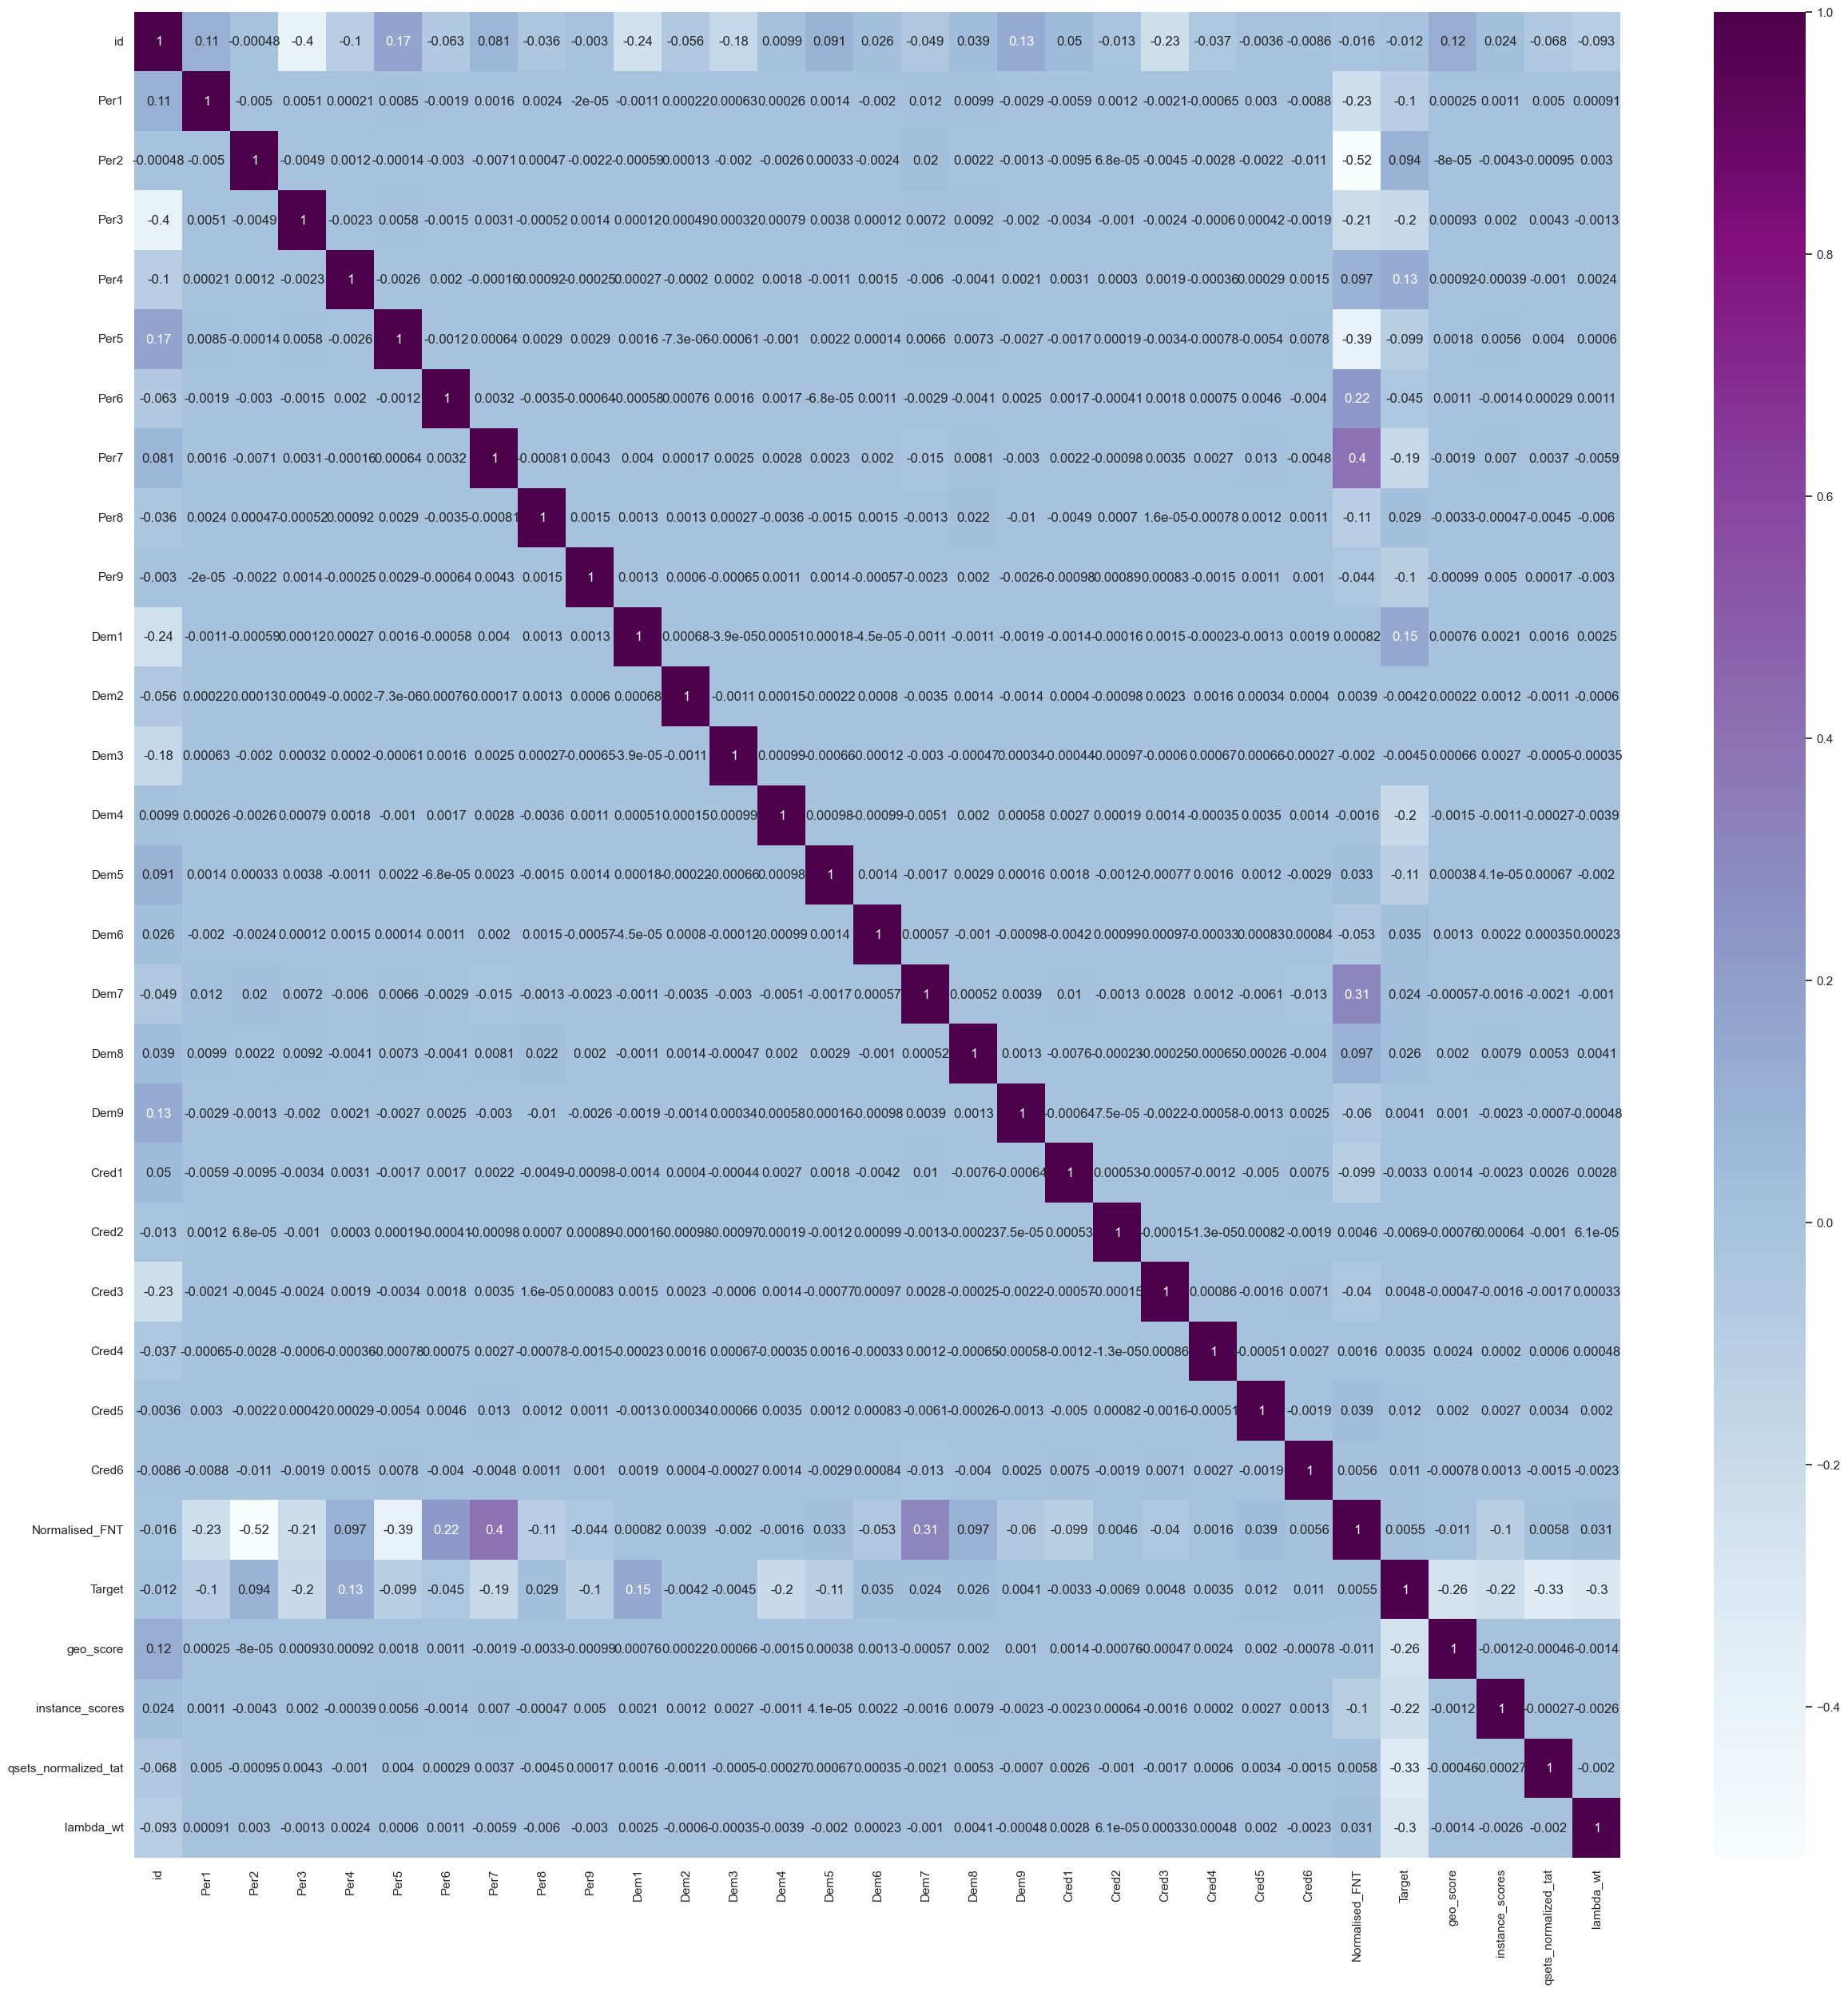

In [80]:
plt.figure(figsize = (30 , 30))
sns.heatmap(train_df.corr() , annot = True , cbar = True , cmap = 'BuPu')
plt.show()

##### Insights : we may check relation of independent vs dependent in regression problem statment because there is we need to satisfy assumption (No Multicollinearity) . but not need in this classification problem statement because any classification alogorithm don't have assumption like No Multicollinearity. but always keep in mind its not thumb rule it always depends on your stakeholder

###### we drop Id  ,Group and Target from independent data . Target is dependent variable so we shuld be drop it and Id and Group is non signgificant variables wrt dependent variable

In [81]:
x = train_df.drop(['id' , 'Group' ,'Target'] , axis = 1)

In [82]:
y = train_df['Target']

In [83]:
x.head(1)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.07,0.58,0.48,0.766667,1.233333,1.993333,0.34,1.01,0.863333,0.46,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.256,-0.06,-0.7,-0.13


In [84]:
y.head(1)

0    0.0
Name: Target, dtype: float64

In [85]:
x.shape

(227845, 29)

In [86]:
y.shape

(227845,)

#### we drop the Id and Group columns from test

##### We inintially drop some data from test like Data and Target but that time we don't think about significant variables so just we dropped non signgificant variables

In [87]:
test_df.drop(['id' , 'Group'] , axis = 1 , inplace = True)

In [88]:
test_df.shape

(56962, 29)

#### This data is for prediction for customer is fraudulant or not

In [89]:
test_df.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


#### check missing values in independent data

In [90]:
x.isnull().any()

Per1                    False
Per2                    False
Per3                    False
Per4                    False
Per5                    False
Per6                    False
Per7                    False
Per8                    False
Per9                    False
Dem1                    False
Dem2                    False
Dem3                    False
Dem4                    False
Dem5                    False
Dem6                    False
Dem7                    False
Dem8                    False
Dem9                    False
Cred1                   False
Cred2                   False
Cred3                   False
Cred4                   False
Cred5                   False
Cred6                   False
Normalised_FNT          False
geo_score               False
instance_scores         False
qsets_normalized_tat    False
lambda_wt               False
dtype: bool

### Outliers Detection

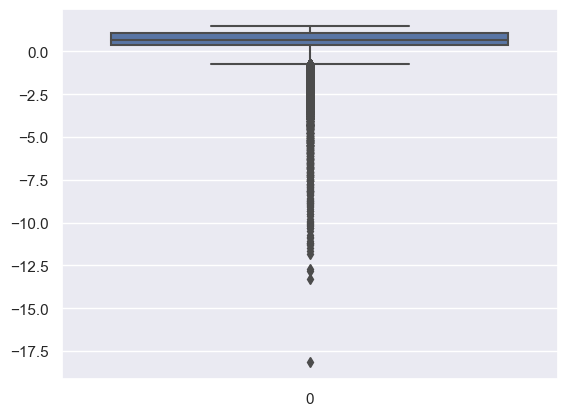

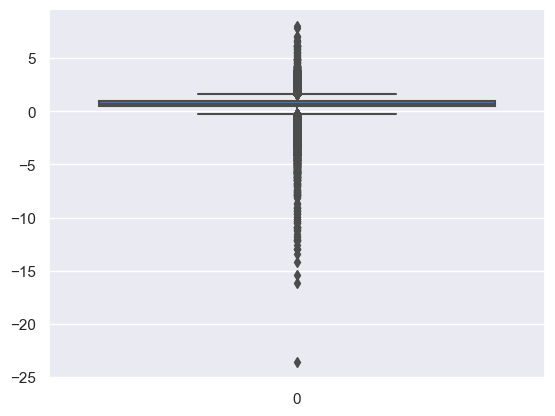

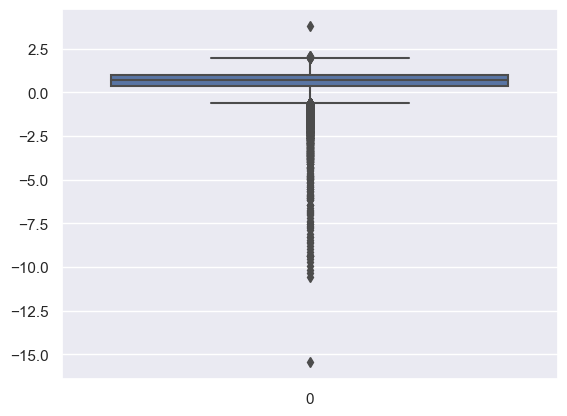

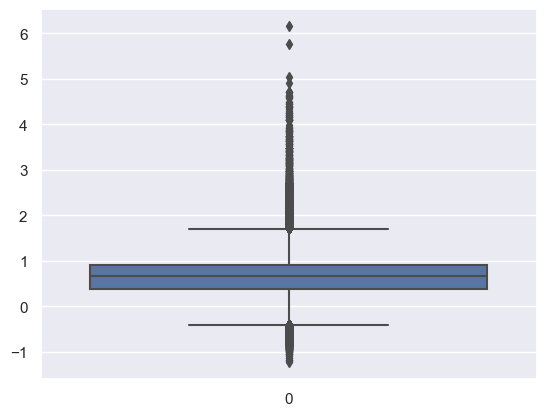

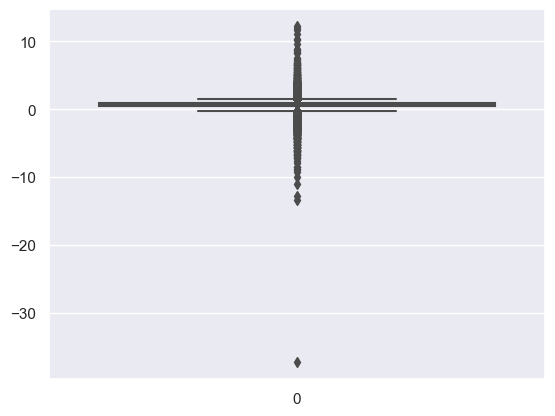

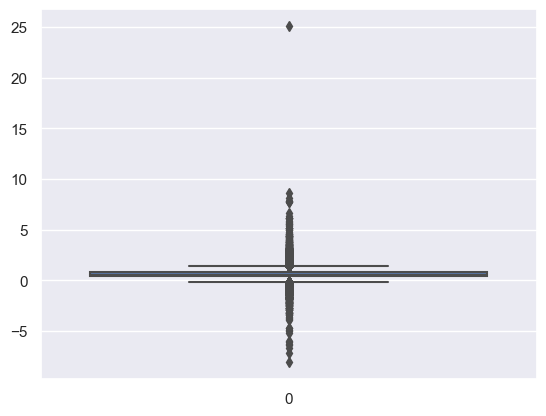

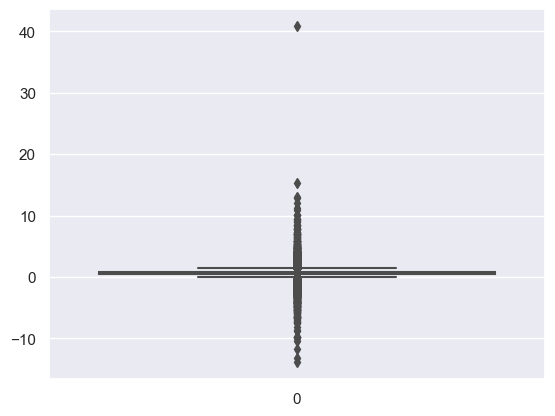

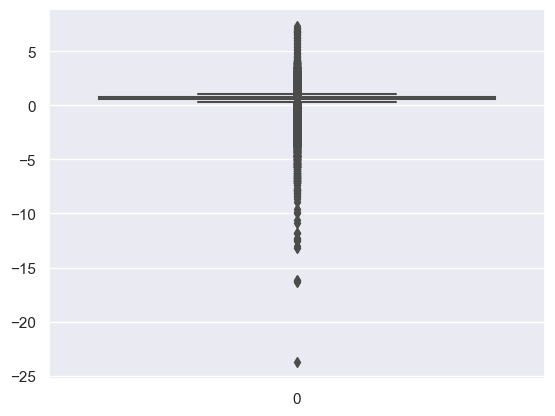

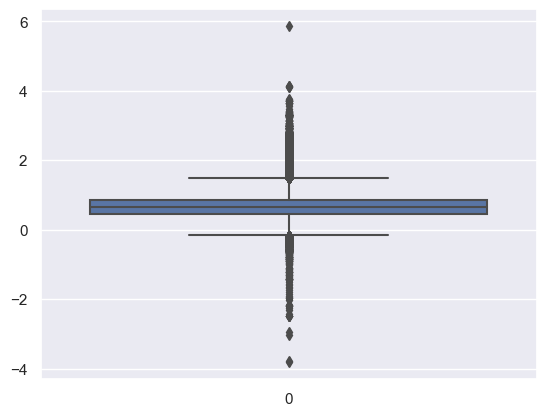

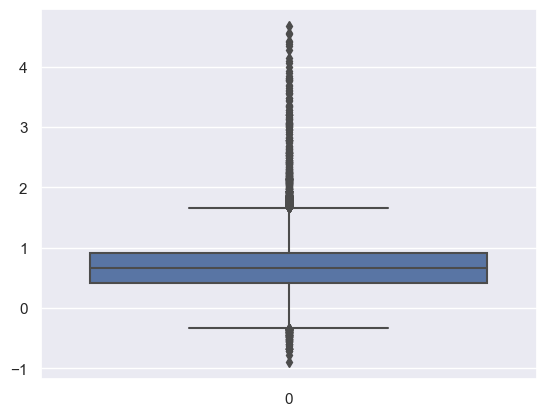

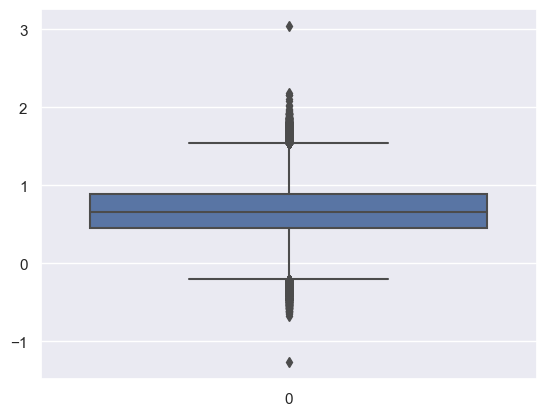

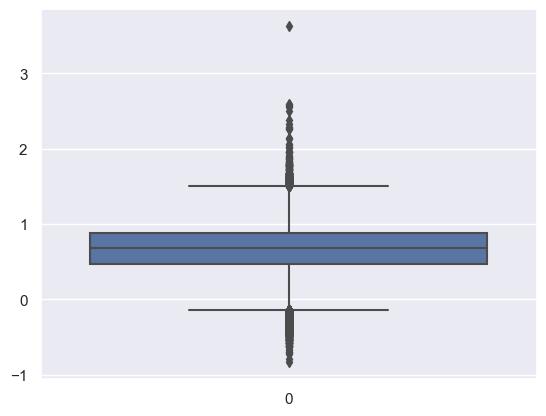

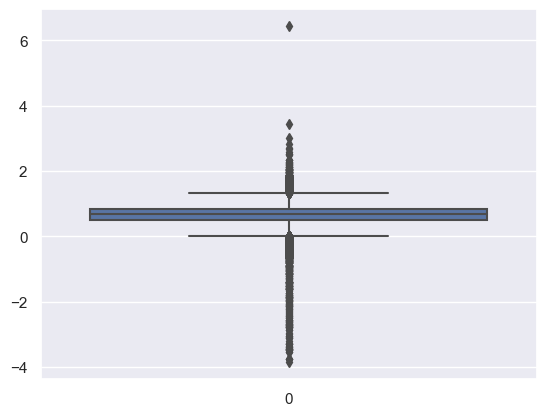

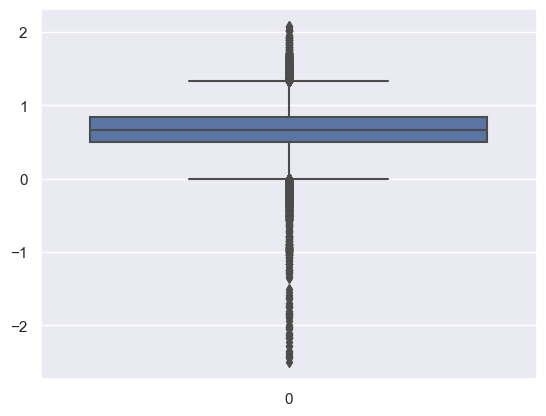

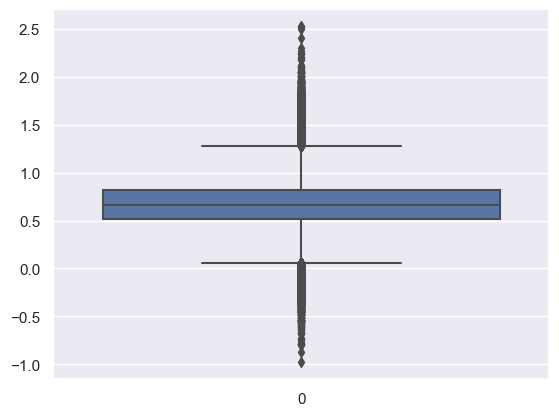

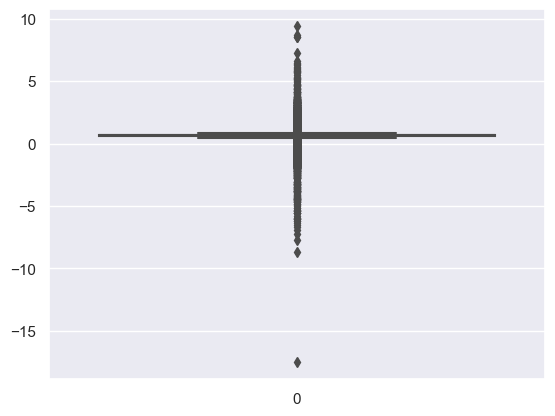

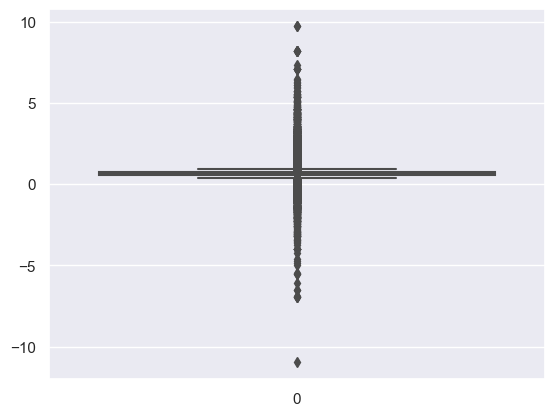

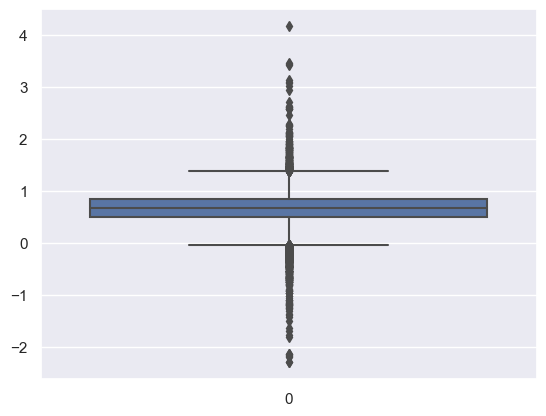

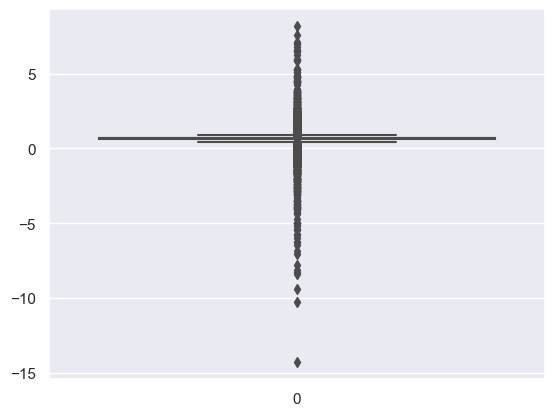

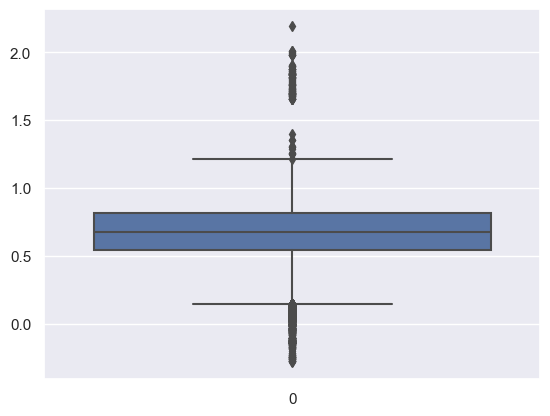

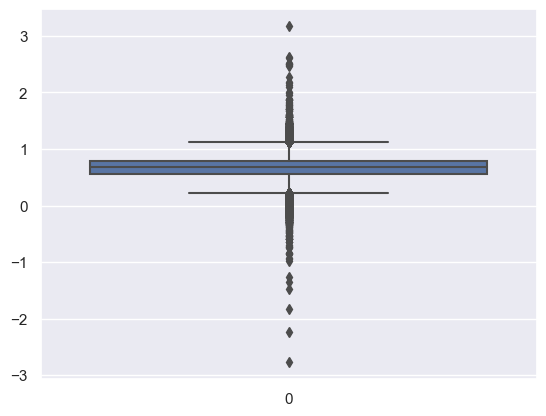

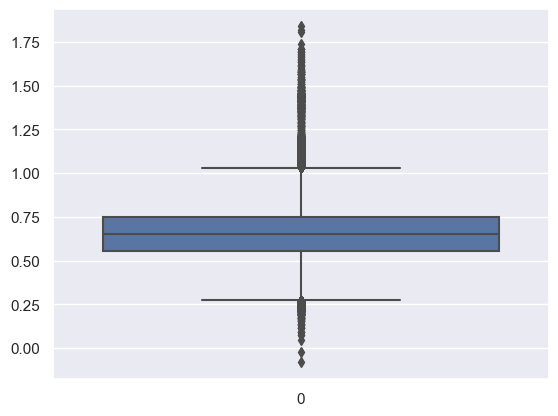

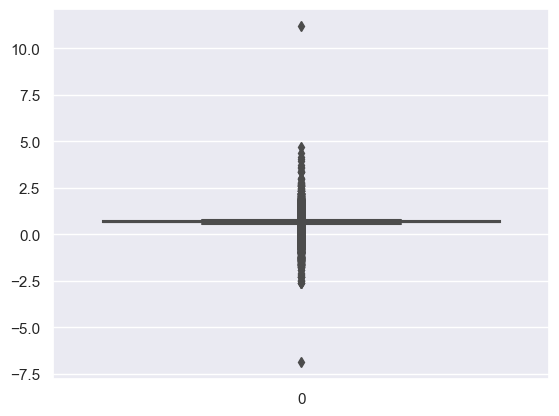

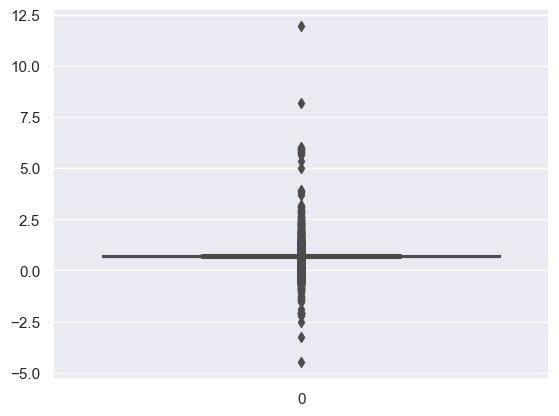

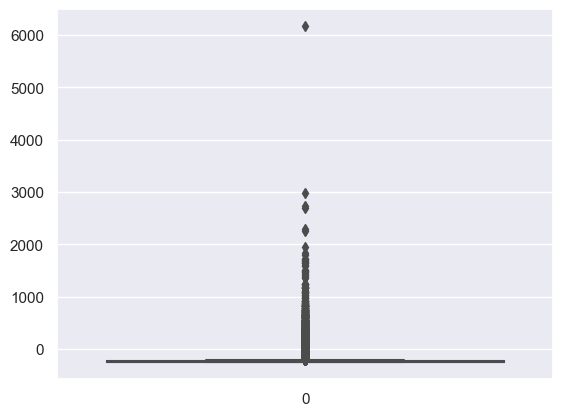

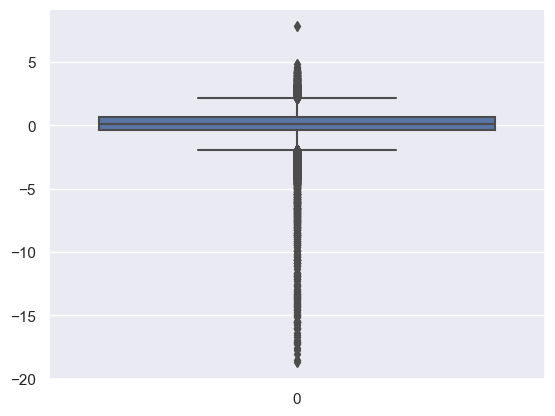

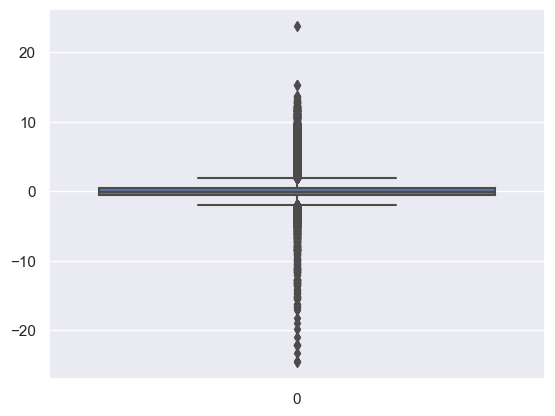

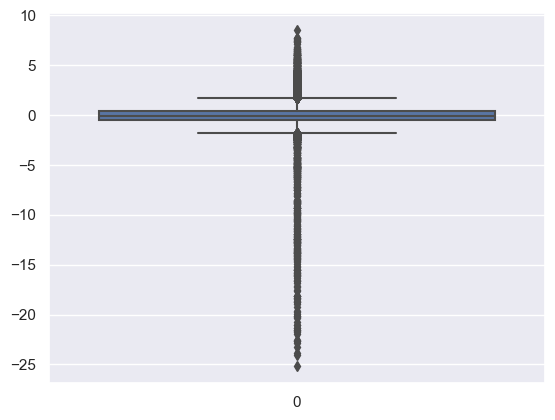

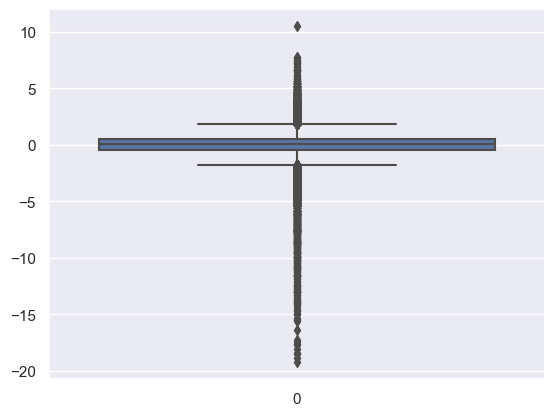

In [91]:
def outliers_detection(col):
    
    sns.boxplot(x[col])
    plt.show()
    
    
for i in list(x.select_dtypes(exclude = ['object']).columns)[0:]:
    
    outliers_detection(i)

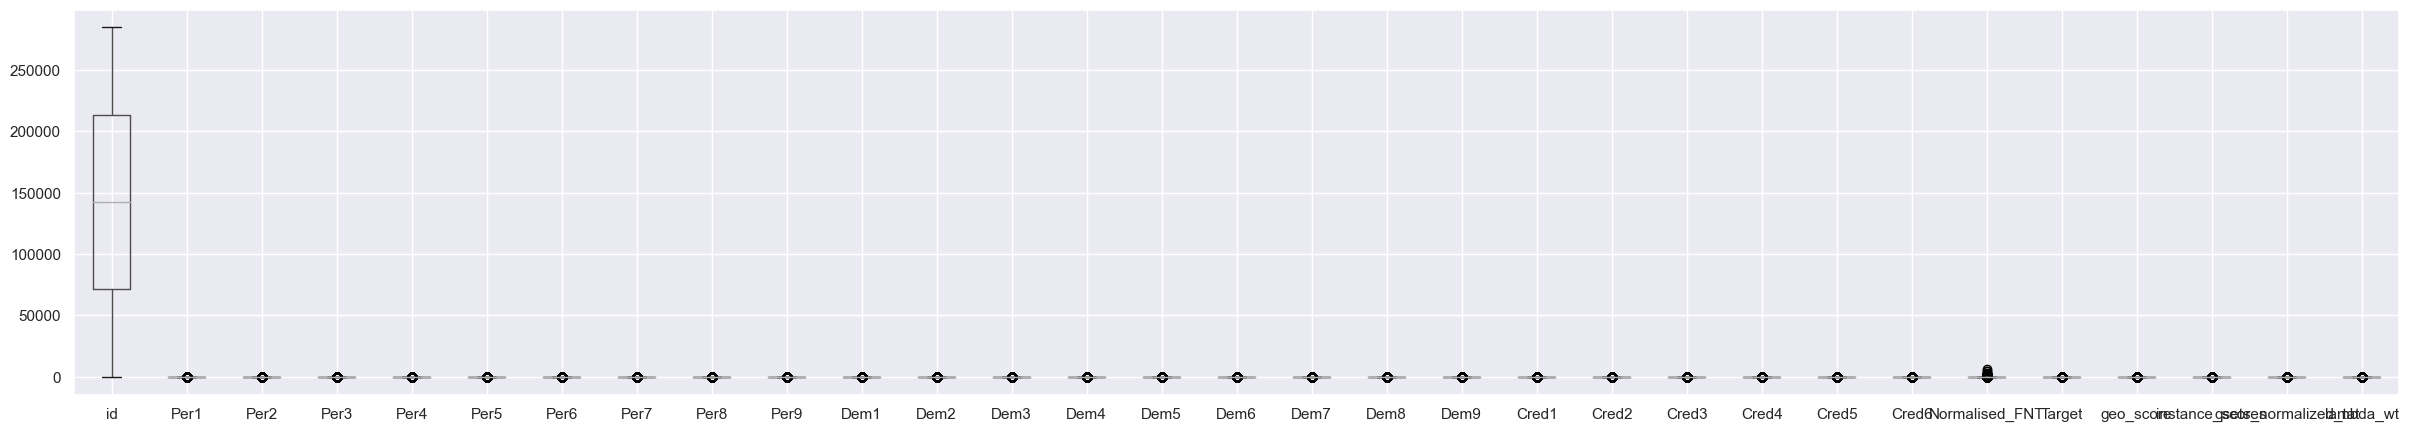

In [92]:

plt.figure(figsize = (30 , 5))
df.boxplot()
plt.show()

#### Checking skewness for understanding distribution of data for treating outliers

In [93]:
x.skew()

Per1                    -3.327698
Per2                    -4.404620
Per3                    -2.359157
Per4                     0.671729
Per5                    -3.058567
Per6                     1.997242
Per7                     3.194325
Per8                    -8.631029
Per9                     0.551772
Dem1                     0.346423
Dem2                     0.067041
Dem3                    -0.306921
Dem4                    -1.082167
Dem5                    -0.272286
Dem6                     0.121181
Dem7                    -3.282017
Dem8                     2.622508
Dem9                    -0.154314
Cred1                   -5.558535
Cred2                   -0.546984
Cred3                   -0.407430
Cred4                    0.580409
Cred5                   -0.969267
Cred6                   12.490678
Normalised_FNT          15.778194
geo_score               -2.242516
instance_scores          1.128864
qsets_normalized_tat    -3.910009
lambda_wt               -1.976084
dtype: float64

##### Insights : Every feature has skewness eighther positive or negative so for treating outliers / capping outliers by median only

### Outliers treatment by capping outliers

In [94]:
# 
# def treating_outliers(col):
    
#     Q1 = x[col].quantile(0.25)
#     Q3 = x[col].quantile(0.75)
    
#     IQR = Q3 - Q1
    
#     upper = Q3 + (1.5 * IQR)
#     lower = Q1 - (1.5 * IQR)
    
    
#     x[col].clip(lower , upper , inplace = True) 
    
# #     x[col]=np.where(df[col] > upper , upper ,
# #               df[col] < lower , lower , x[col])

# 

In [95]:
# 
# for i in x.columns:
    
#     treating_outliers(i)
    
# 

### After treating Outliers

###### We just call the existing function here to  check after detection

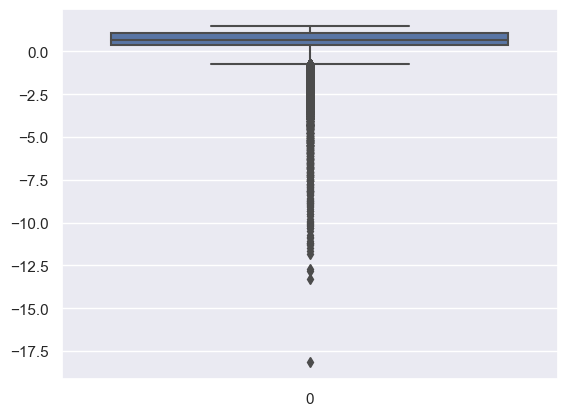

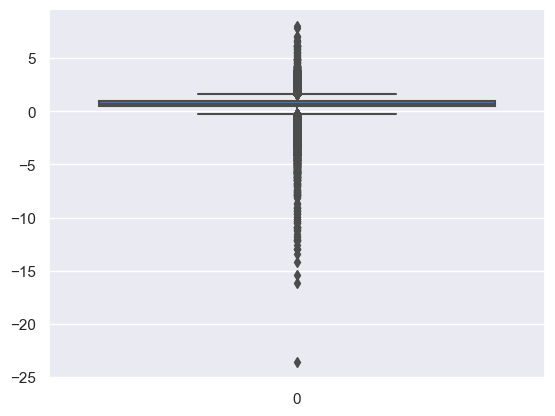

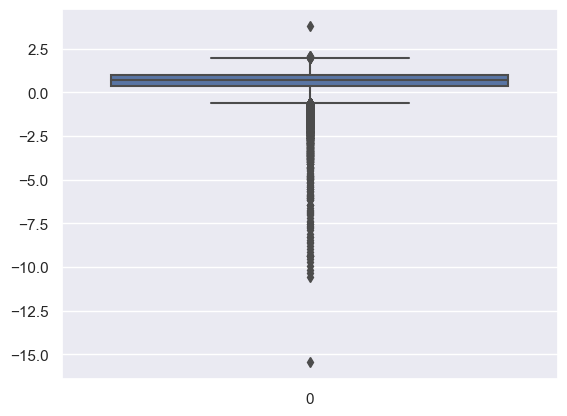

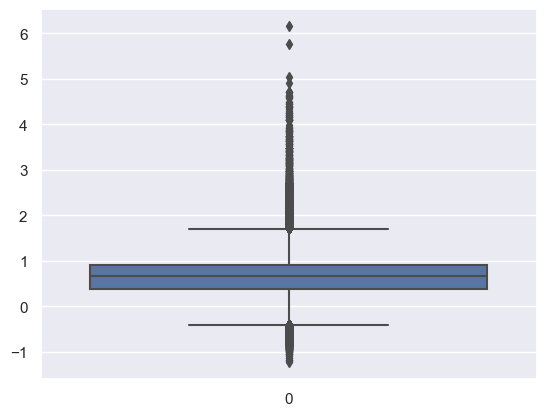

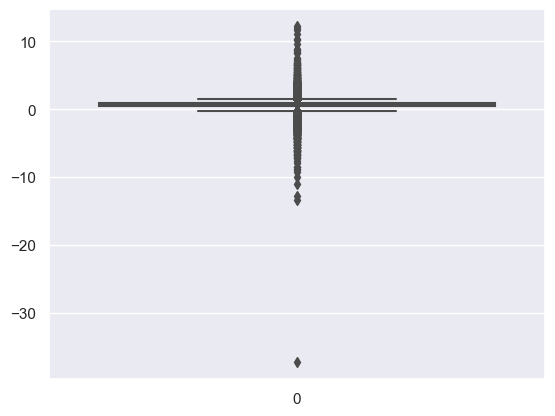

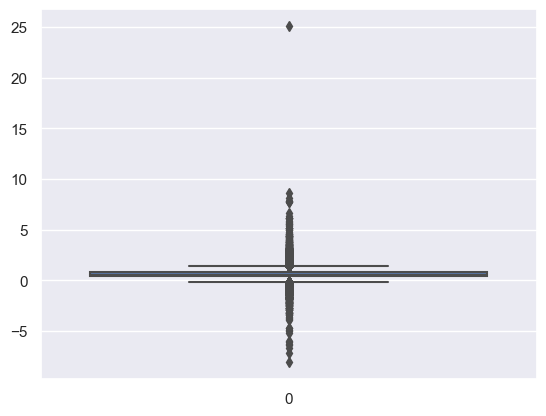

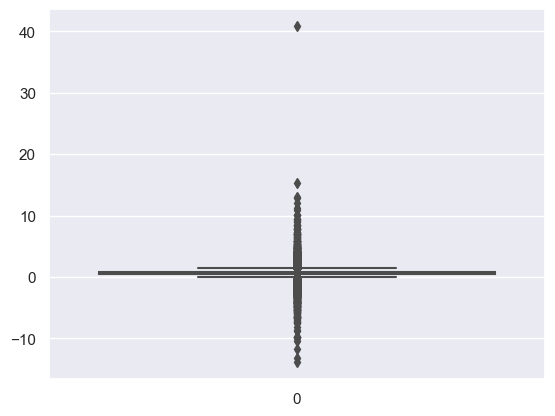

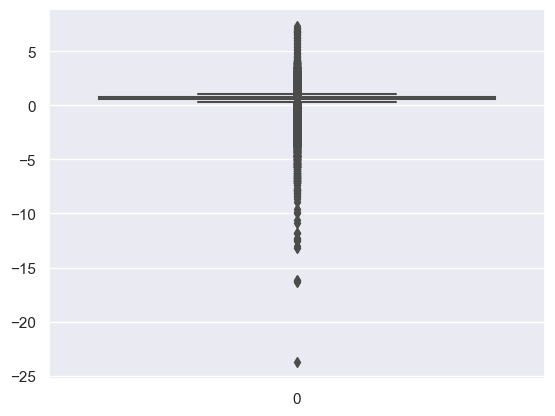

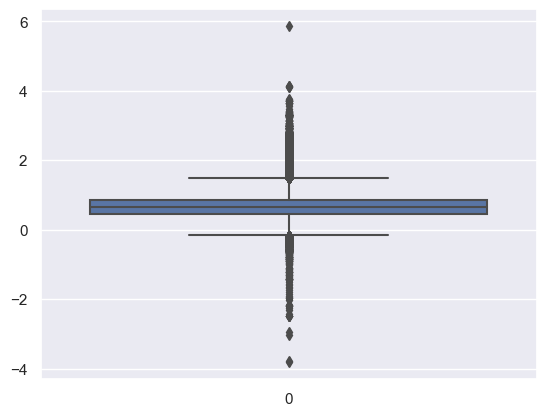

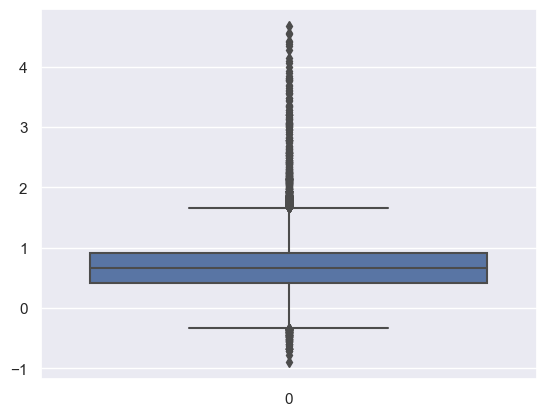

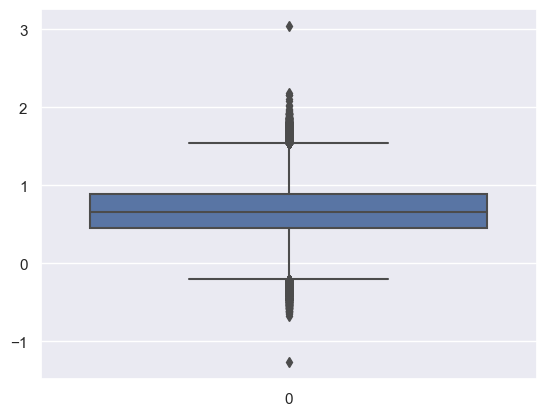

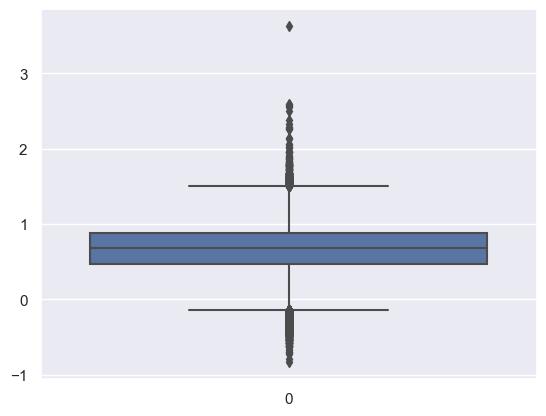

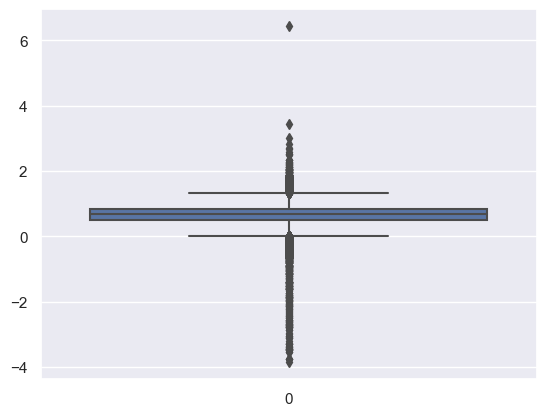

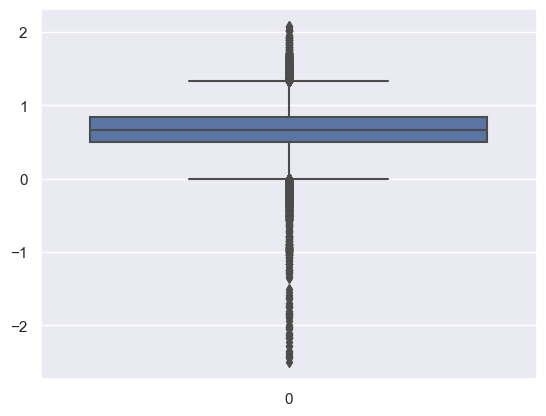

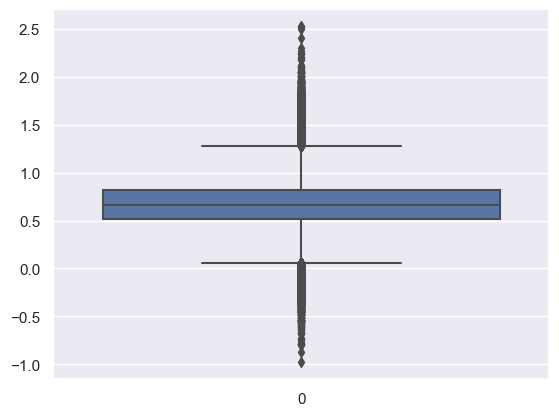

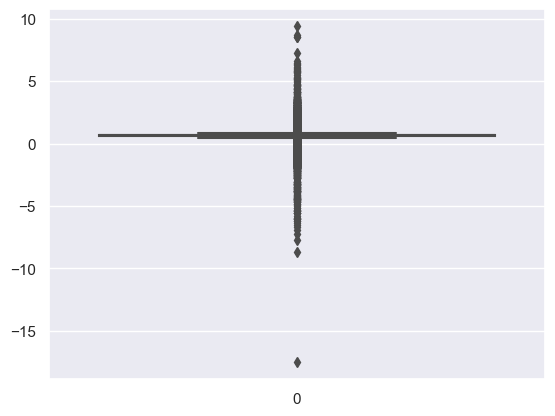

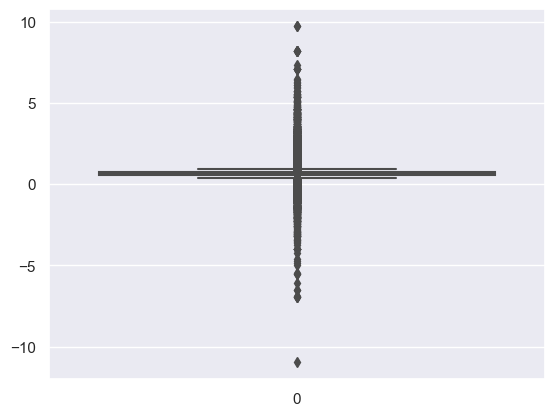

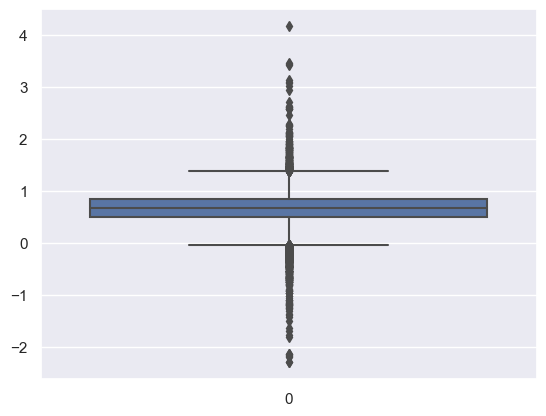

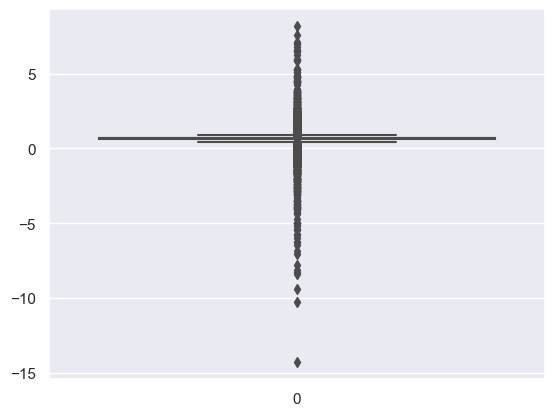

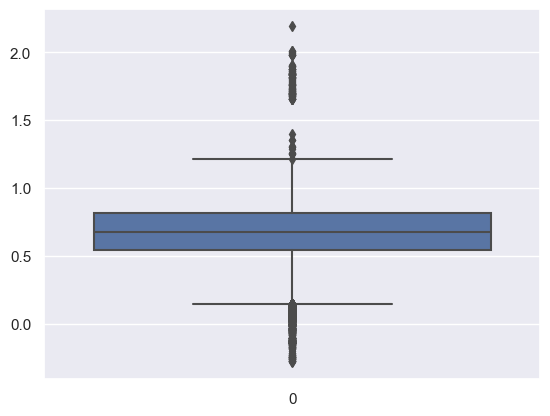

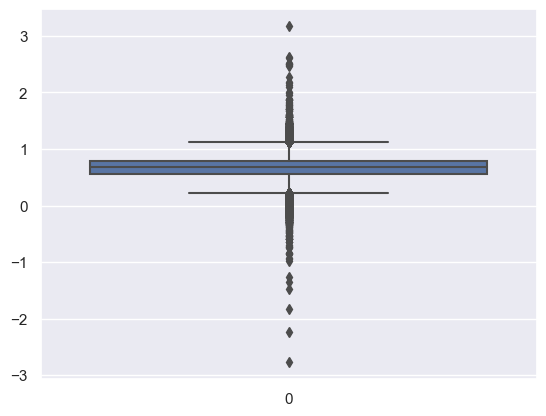

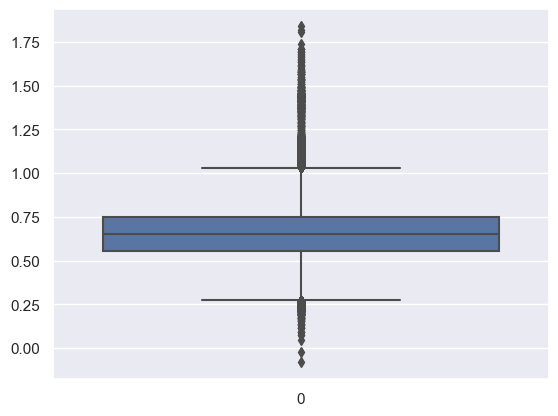

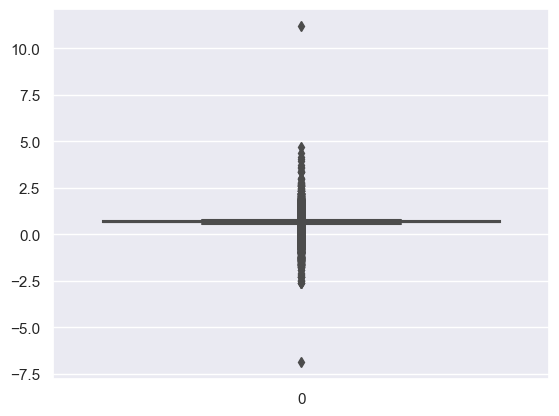

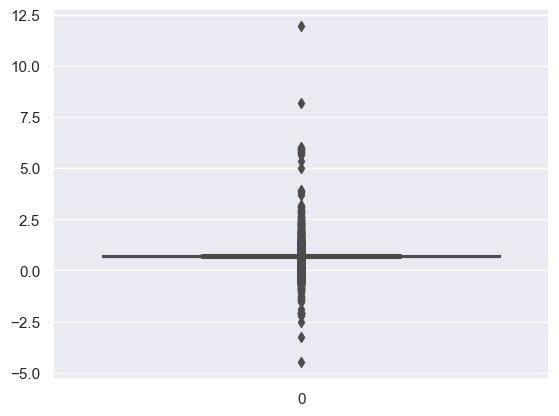

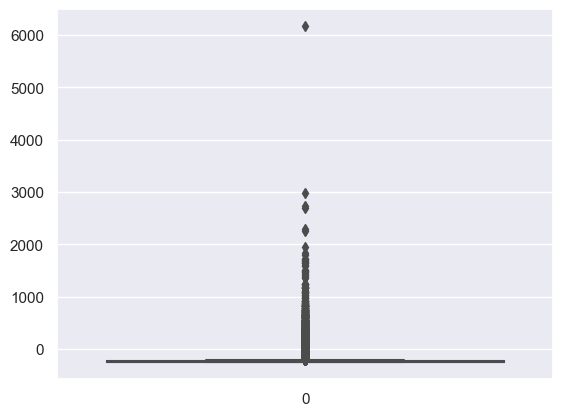

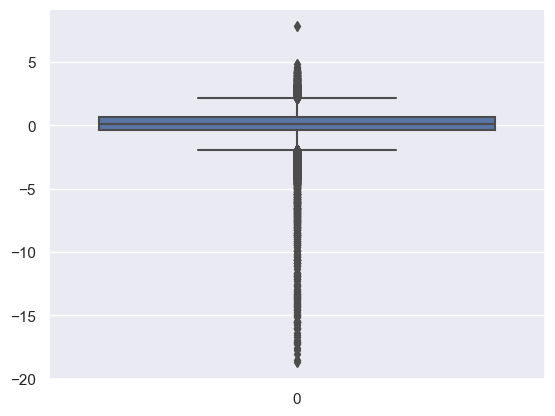

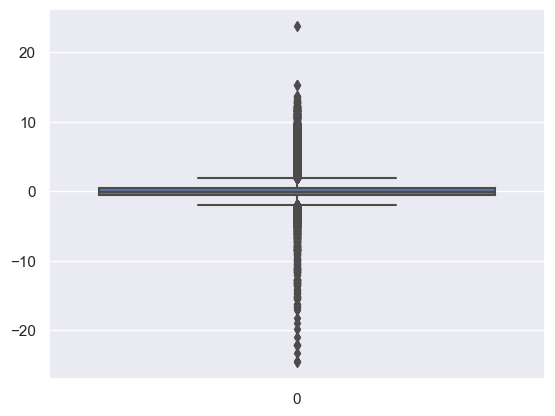

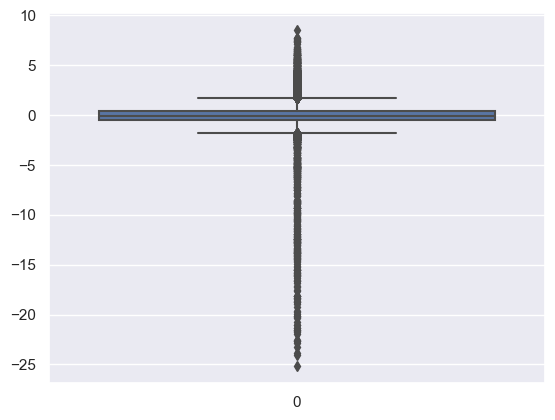

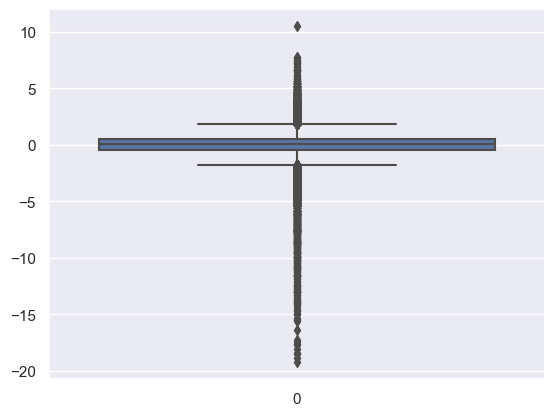

In [96]:
for i in x.columns:
    
    outliers_detection(i)

##### Insights : We are not treating with outliers here because we have very less range in upper and lower limit

### Describe 

In [97]:
x.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


#### Insights : No need to encoding here because all features are in numerical only

### Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [100]:
scaler

StandardScaler()

In [101]:
scaled_x = scaler.fit_transform(x)

In [102]:
test_df_scaled = scaler.transform(test_df)

### Check Data is Imabalnce 

In [103]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [104]:
y.value_counts()[0.0]/len(df)

0.7986145003458482

In [105]:
y.value_counts()[1.0] / len(df)

0.0013833929643583198

In [106]:
minority_class = y.value_counts()[1.0]
majority_class = y.value_counts()[0.0]

In [107]:
print(minority_class)
print(majority_class)

394
227451


In [108]:
if minority_class * 2 <= majority_class:
    
    print('Data is Imbalance')
    
else:
    
    print('Data is Balance')

Data is Imbalance


#### Insights : we have already more than 2 lakhs 84 thousand data is there so no need to balance it so we make it stratified at the time of train test split

### Split data into train and test

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1 , stratify = y)

In [111]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(182276, 29) (45569, 29) (182276,) (45569,)


In [112]:
y_train.value_counts()

0.0    181961
1.0       315
Name: Target, dtype: int64

In [113]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

##### Insights : Stratify make split y data categories in train and test. 394 split into train and test like(315 and 79)

### Scaled the train and test data

In [114]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [115]:
print(x_train_scaled.shape , x_test_scaled.shape)

(182276, 29) (45569, 29)


In [116]:
print(x_train.shape , x_test.shape , y_train.shape , x_test.shape)

(182276, 29) (45569, 29) (182276,) (45569, 29)


## Model Building

### LogisticRegression

In [117]:
lr = LogisticRegression()
lr.fit(x_train , y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)
training_accuracy_lr = accuracy_score(y_train , y_train_pred_lr)
testing_accuracy_lr = accuracy_score(y_test , y_test_pred_lr)
print('Training Accuracy of LogisticRegression :'  , training_accuracy_lr)
print('Testing Accuracy of LogisticRegression :' , testing_accuracy_lr)
cm_train_lr = confusion_matrix(y_train , y_train_pred_lr)
cm_test_lr = confusion_matrix(y_test , y_test_pred_lr)
print('Training confusion Matrix :')
print( cm_train_lr)
print('Testing confusion matrix :')
print(cm_test_lr)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_lr))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_lr))

Training Accuracy of LogisticRegression : 0.9991496412034497
Testing Accuracy of LogisticRegression : 0.9992099892470758
Training confusion Matrix :
[[181934     27]
 [   128    187]]
Testing confusion matrix :
[[45486     4]
 [   32    47]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.87      0.59      0.71       315

    accuracy                           1.00    182276
   macro avg       0.94      0.80      0.85    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.92      0.59      0.72        79

    accuracy                           1.00     45569
   macro avg       0.96      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569



### Training Accuracy of LogisticRegression : 0.9991496412034497
### Testing Accuracy of LogisticRegression : 0.9992099892470758

In [118]:
len(df[df['Target'] == 1.0])

394

In [119]:
len(df[df['Target'] == 0.0])

227451

In [120]:
len(df)

284807

In [121]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [122]:
outlier_fraction = 394 / (394 +  227451) 

In [123]:
outlier_fraction

0.001729245759178389

#### Insights : We get very high accuracy because we have 227451 records are normal transaction and we have only 394 records are fraud transaction so mostly data get trained on normal transaction data so obivious we get high accuracy

#### We get precision , recall and f1 score get more than threshold value (70 %)

## DecisionTree

In [124]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)
training_accuracy_dt = accuracy_score(y_train , y_train_pred_dt)
testing_accuracy_dt = accuracy_score(y_test , y_test_pred_dt)
print('Training Accuracy of DecisionTreeclassifier :'  , training_accuracy_dt)
print('Testing Accuracy of DecisionTreeclassifier :' , testing_accuracy_dt)
cm_train_dt = confusion_matrix(y_train , y_train_pred_dt)
cm_test_dt = confusion_matrix(y_test , y_test_pred_dt)
print('Training confusion Matrix :')
print( cm_train_dt)
print('Testing confusion matrix :')
print(cm_test_dt)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_dt))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_dt))

Training Accuracy of DecisionTreeclassifier : 1.0
Testing Accuracy of DecisionTreeclassifier : 0.9992319339902126
Training confusion Matrix :
[[181961      0]
 [     0    315]]
Testing confusion matrix :
[[45475    15]
 [   20    59]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.80      0.75      0.77        79

    accuracy                           1.00     45569
   macro avg       0.90      0.87      0.89     45569
weighted avg       1.00      1.00      1.00     45569



#### Insights : DecisionTree Model gets overfitted because we get 100 % training accuracy  as well we are getting more than 10 % difference in training and testing recall and f1 score also. 

## RandomForestClassifier(Ginni)

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)
training_accuracy_rf = accuracy_score(y_train , y_train_pred_rf)
testing_accuracy_rf = accuracy_score(y_test , y_test_pred_rf)
print('Training Accuracy of RandomForest :'  , training_accuracy_rf)
print('Testing Accuracy of RandomForest :' , testing_accuracy_rf)
cm_train_rf = confusion_matrix(y_train , y_train_pred_rf)
cm_test_rf = confusion_matrix(y_test , y_test_pred_rf)
print('Training confusion Matrix :')
print( cm_train_rf)
print('Testing confusion matrix :')
print(cm_test_rf)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_rf))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_rf))

Training Accuracy of RandomForest : 1.0
Testing Accuracy of RandomForest : 0.9995830498804011
Training confusion Matrix :
[[181961      0]
 [     0    315]]
Testing confusion matrix :
[[45490     0]
 [   19    60]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       1.00      0.76      0.86        79

    accuracy                           1.00     45569
   macro avg       1.00      0.88      0.93     45569
weighted avg       1.00      1.00      1.00     45569



## RandomForestClassifier(Entropy)

In [126]:
rf = RandomForestClassifier(criterion = 'entropy')
rf.fit(x_train , y_train)
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)
training_accuracy_rf = accuracy_score(y_train , y_train_pred_rf)
testing_accuracy_rf = accuracy_score(y_test , y_test_pred_rf)
print('Training Accuracy of RandomForest :'  , training_accuracy_rf)
print('Testing Accuracy of RandomForest :' , testing_accuracy_rf)
cm_train_rf = confusion_matrix(y_train , y_train_pred_rf)
cm_test_rf = confusion_matrix(y_test , y_test_pred_rf)
print('Training confusion Matrix :')
print( cm_train_rf)
print('Testing confusion matrix :')
print(cm_test_rf)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_rf))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_rf))

Training Accuracy of RandomForest : 1.0
Testing Accuracy of RandomForest : 0.9995611051372644
Training confusion Matrix :
[[181961      0]
 [     0    315]]
Testing confusion matrix :
[[45490     0]
 [   20    59]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       1.00      0.75      0.86        79

    accuracy                           1.00     45569
   macro avg       1.00      0.87      0.93     45569
weighted avg       1.00      1.00      1.00     45569



#### Insights : Both Ginni and Entropy model get overfitted and its training and testing difference are more than 10% in precision , recall 

## When we have Imabalance dataset we can check performance metrics as f1 score 

## XGBOOST

In [127]:
xg = XGBClassifier()
xg.fit(x_train , y_train)
y_train_pred_xg = xg.predict(x_train)
y_test_pred_xg = xg.predict(x_test)
training_accuracy_xg = accuracy_score(y_train , y_train_pred_xg)
testing_accuracy_xg = accuracy_score(y_test , y_test_pred_xg)
print('Training Accuracy of XGBOOST :'  , training_accuracy_xg)
print('Testing Accuracy of XGBOOST :' , testing_accuracy_xg)
cm_train_xg = confusion_matrix(y_train , y_train_pred_xg)
cm_test_xg = confusion_matrix(y_test , y_test_pred_xg)
print('Training confusion Matrix :')
print(cm_train_xg)
print('Testing confusion matrix :')
print(cm_test_xg)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_xg))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_xg))

Training Accuracy of XGBOOST : 1.0
Testing Accuracy of XGBOOST : 0.9996049946235379
Training confusion Matrix :
[[181961      0]
 [     0    315]]
Testing confusion matrix :
[[45490     0]
 [   18    61]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       1.00      0.77      0.87        79

    accuracy                           1.00     45569
   macro avg       1.00      0.89      0.94     45569
weighted avg       1.00      1.00      1.00     45569



#### Insights : Xgboost model is overfitted because its training accuracy is 100% as well its training and testing recall difference is more than 10%

## Support Vector Machine

In [128]:
svm = SVC()
svm.fit(x_train , y_train)
y_train_pred_svm = svm.predict(x_train)
y_test_pred_svm = svm.predict(x_test)
training_accuracy_svm = accuracy_score(y_train , y_train_pred_svm)
testing_accuracy_svm = accuracy_score(y_test , y_test_pred_svm)
print('Training Accuracy of SVM :'  , training_accuracy_svm)
print('Testing Accuracy of SVM :' , testing_accuracy_svm)
cm_train_svm = confusion_matrix(y_train , y_train_pred_svm)
cm_test_svm = confusion_matrix(y_test , y_test_pred_svm)
print('Training confusion Matrix :')
print( cm_train_svm)
print('Testing confusion matrix :')
print(cm_test_svm)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_svm))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_svm))

Training Accuracy of SVM : 0.9986942877833614
Testing Accuracy of SVM : 0.9986833154117931
Training confusion Matrix :
[[181933     28]
 [   210    105]]
Testing confusion matrix :
[[45487     3]
 [   57    22]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.79      0.33      0.47       315

    accuracy                           1.00    182276
   macro avg       0.89      0.67      0.73    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.88      0.28      0.42        79

    accuracy                           1.00     45569
   macro avg       0.94      0.64      0.71     45569
weighted avg       1.00      1.00      1.00     45569



#### Insights : SVM is giving very good accuracy but when we check another perfromance evaluation metrics like classification report there we get very less / not good recall score like training and testing is 0.67 and 0.64 . so it is less than 70 % . we are not considering that algorithm which give less than 70% in classification report.so we are not go with svm also.

## KNearest Neighbors

In [129]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled , y_train)
y_train_pred_knn = knn.predict(x_train_scaled)
y_test_pred_knn = knn.predict(x_test_scaled)
training_accuracy_knn = accuracy_score(y_train , y_train_pred_knn)
testing_accuracy_knn = accuracy_score(y_test , y_test_pred_knn)
print('Training Accuracy of KNN :'  , training_accuracy_knn)
print('Testing Accuracy of KNN :' , testing_accuracy_knn)
cm_train_knn = confusion_matrix(y_train , y_train_pred_knn)
cm_test_knn = confusion_matrix(y_test , y_test_pred_knn)
print('Training confusion Matrix :')
print( cm_train_knn)
print('Testing confusion matrix :')
print(cm_test_knn)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_knn))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_knn))

Training Accuracy of KNN : 0.9995336742083434
Testing Accuracy of KNN : 0.9994513814215804
Training confusion Matrix :
[[181948     13]
 [    72    243]]
Testing confusion matrix :
[[45489     1]
 [   24    55]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.95      0.77      0.85       315

    accuracy                           1.00    182276
   macro avg       0.97      0.89      0.93    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.98      0.70      0.81        79

    accuracy                           1.00     45569
   macro avg       0.99      0.85      0.91     45569
weighted avg       1.00      1.00      1.00     45569



#### Insights : KNN is also give very best results . it give best accuracies as well it give best precision , recall and f1 score and it does not have more than 10% difference between training and testing in precision and recall and it also not be less than 70 % also

## Naive Bayes

In [130]:
nb = BernoulliNB()
nb.fit(x_train , y_train)
y_train_pred_nb = nb.predict(x_train)
y_test_pred_nb = nb.predict(x_test)
training_accuracy_nb = accuracy_score(y_train , y_train_pred_nb)
testing_accuracy_nb = accuracy_score(y_test , y_test_pred_nb)
print('Training Accuracy of naive bayes :'  , training_accuracy_nb)
print('Testing Accuracy of naive bayes :' , testing_accuracy_nb)
cm_train_nb = confusion_matrix(y_train , y_train_pred_nb)
cm_test_nb = confusion_matrix(y_test , y_test_pred_nb)
print('Training confusion Matrix :')
print( cm_train_nb)
print('Testing confusion matrix :')
print(cm_test_nb)
print('Classification report training :')
print(classification_report(y_train , y_train_pred_nb))
print('Classification report testing :')
print( classification_report(y_test , y_test_pred_nb))

Training Accuracy of naive bayes : 0.9973007965941759
Testing Accuracy of naive bayes : 0.9976299677412276
Training confusion Matrix :
[[181568    393]
 [    99    216]]
Testing confusion matrix :
[[45406    84]
 [   24    55]]
Classification report training :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.35      0.69      0.47       315

    accuracy                           1.00    182276
   macro avg       0.68      0.84      0.73    182276
weighted avg       1.00      1.00      1.00    182276

Classification report testing :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.40      0.70      0.50        79

    accuracy                           1.00     45569
   macro avg       0.70      0.85      0.75     45569
weighted avg       1.00      1.00      1.00     45569



#### Insights : Naive Bayes has good accuracy but as we aleady say its imbalance data so thats why we need to consider others performance evaluation metrics also like precision , recall and f1 score. so here we get not a  good precision we need precision more than 70% so here we not get that one(0.68) so we are not considering this naive bayes model. 

#### Individual Accuracies

In [131]:
Accuracy = pd.DataFrame({'Models' : ['LogisticRegression' ,'DecisionTree','RandomForest_Ginni','RandomForest_Entropy' , 'XGBoost' , 'SVM' , 'KNN' , 'Naive Bayes' ] , 'Training Accuracy' : [training_accuracy_lr , training_accuracy_dt , training_accuracy_rf , training_accuracy_rf , training_accuracy_xg , training_accuracy_svm , training_accuracy_knn , training_accuracy_nb] , 'Testing Accuracy' : [testing_accuracy_lr , testing_accuracy_dt , testing_accuracy_rf , testing_accuracy_rf , testing_accuracy_xg  , testing_accuracy_svm , testing_accuracy_knn , testing_accuracy_nb]})

In [132]:
Accuracy

,Models,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.999150,0.999210
1,DecisionTree,1.000000,0.999232
2,RandomForest_Ginni,1.000000,0.999561
3,RandomForest_Entropy,1.000000,0.999561
4,XGBoost,1.000000,0.999605
5,SVM,0.998694,0.998683
6,KNN,0.999534,0.999451
7,Naive Bayes,0.997301,0.997630


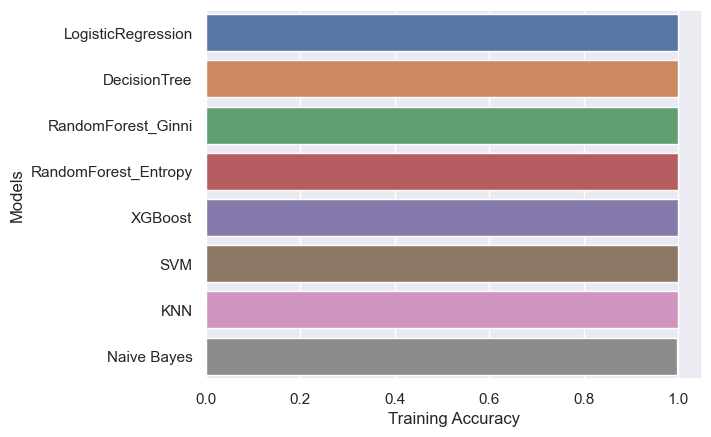

In [133]:
sns.barplot(data = Accuracy , y = 'Models' , x = 'Training Accuracy')
plt.show()

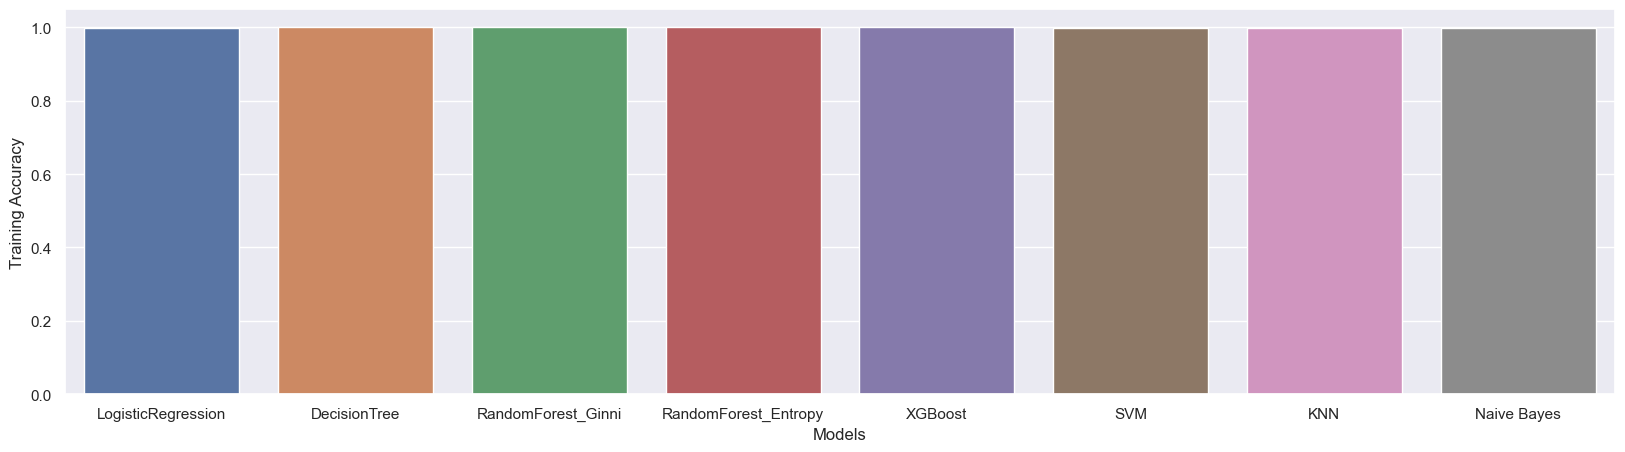

In [134]:
plt.figure(figsize = (20 , 5))
sns.barplot(data = Accuracy , x = 'Models' , y = 'Training Accuracy')
plt.show()

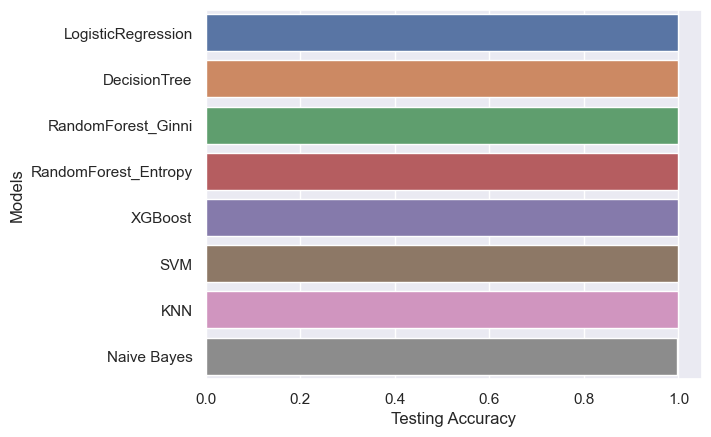

In [135]:
sns.barplot(data = Accuracy , y = 'Models' , x = 'Testing Accuracy')
plt.show()

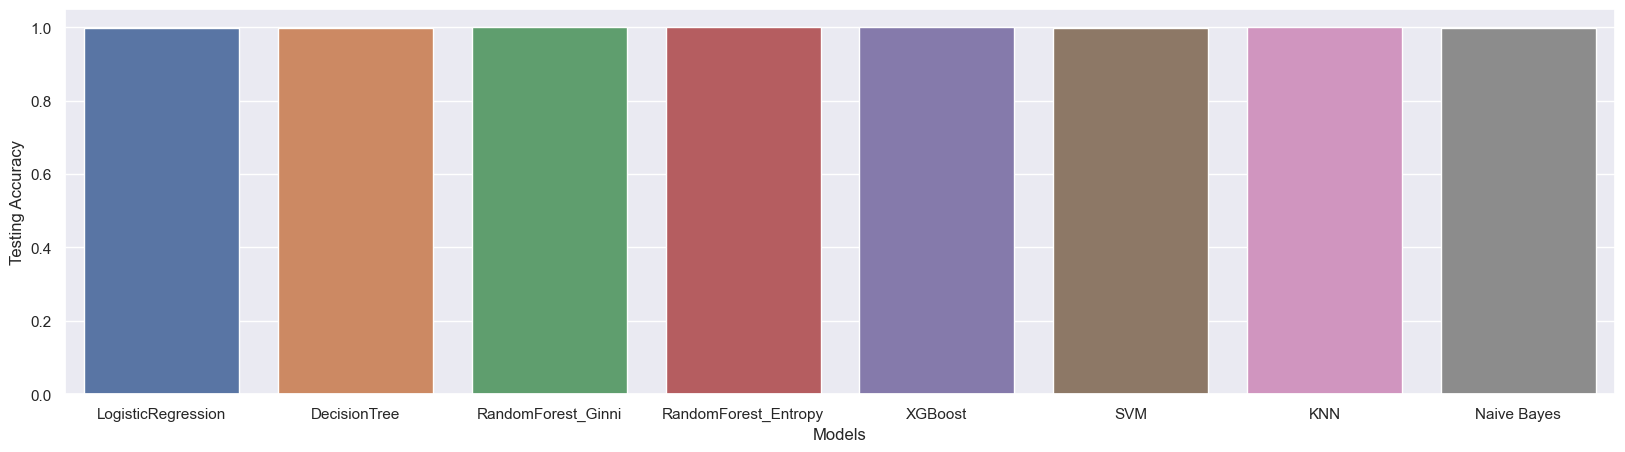

In [136]:
plt.figure(figsize = (20 , 5))
sns.barplot(data = Accuracy , x = 'Models' , y = 'Testing Accuracy')
plt.show()

#### Here we can use stacking because we get individual accuracy of every algorithm more than 70% but for best practice we can check with voting and stacking also

## VotingClassifier

In [137]:
estimator = [('lr' , lr) ,('dt' , dt) , ('rf' , rf) , ('xg' , xg) , ('svm' , svm ), ('knn' , knn)] 

In [138]:
estimator

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('rf', RandomForestClassifier(criterion='entropy')),
 ('xg',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('svm', SVC()),
 ('knn', KNeighborsClassifier())]

In [139]:
voting = VotingClassifier(estimators = estimator)

In [140]:
voting

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy')),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svm', SVC()), ('knn', KNeighborsClassifier())])

#### Fit the voting model

In [141]:
voting.fit(x_train , y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy')),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svm', SVC()), ('knn', KNeighborsClassifier())])

In [142]:
voting

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy')),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svm', SVC()), ('knn', KNeighborsClassifier())])

#### Training model of voting

In [143]:
x_train_array = x_train.values

In [144]:
y_train_pred_vote = voting.predict(x_train_array)

In [145]:
print(y_train_pred_vote)

[0. 0. 0. ... 0. 0. 0.]


#### Training Accuracy of voting

In [146]:
training_accuracy_vote = accuracy_score(y_train , y_train_pred_vote)

In [147]:
training_accuracy_vote

0.9996543702955957

#### Confusion Matrix

In [148]:
confusion_matrix(y_train , y_train_pred_vote)

array([[181961,      0],
       [    63,    252]], dtype=int64)

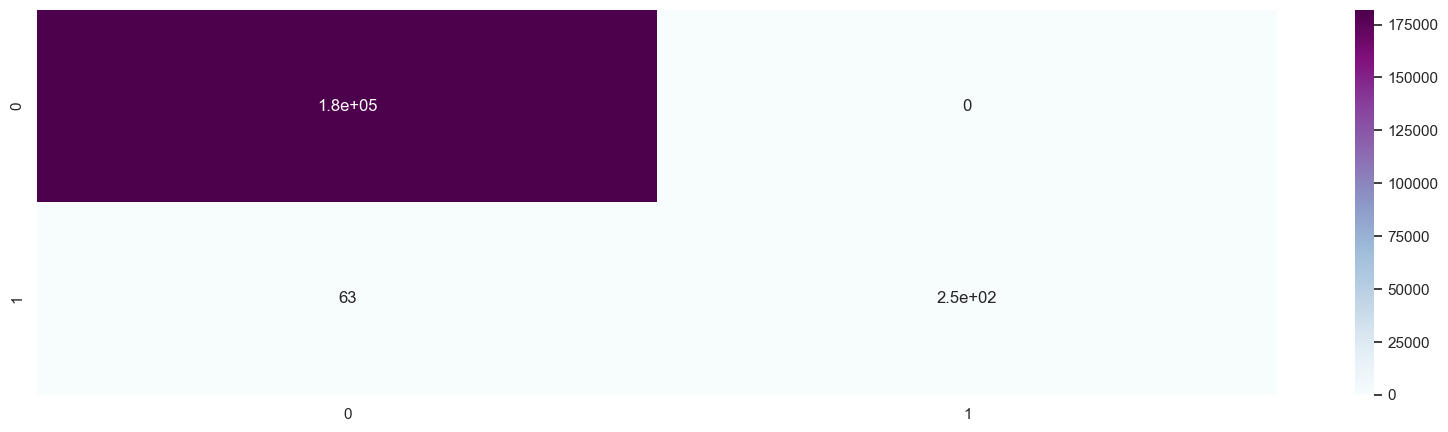

In [149]:
plt.figure(figsize = (20 , 5))
sns.heatmap(confusion_matrix(y_train , y_train_pred_vote) , annot = True , cmap = 'BuPu' , cbar = True)
plt.show()

### Classification_report on training data

In [150]:
print(classification_report(y_train , y_train_pred_vote))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.80      0.89       315

    accuracy                           1.00    182276
   macro avg       1.00      0.90      0.94    182276
weighted avg       1.00      1.00      1.00    182276



#### AUC ROC Curve on training data

In [151]:
roc_auc_score_train_vote = roc_auc_score(y_train , y_train_pred_vote)

In [152]:
roc_auc_score_train_vote

0.9

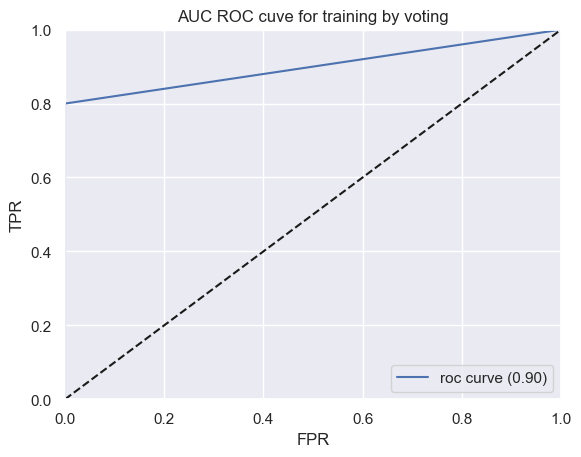

In [153]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred_vote )

plt.plot(fpr , tpr , label = 'roc curve (%1.2f)'%roc_auc_score_train_vote)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve for training by voting')
plt.legend(loc = 'lower right')
plt.show()

#### Testing Model on voting

In [154]:
x_test_array = x_test.values

In [155]:
y_test_pred_vote = voting.predict(x_test_array)

In [156]:
print(y_test_pred_vote)

[0. 0. 0. ... 0. 0. 0.]


#### Testing Accuracy of voting

In [157]:
testing_accuracy_vote = accuracy_score(y_test , y_test_pred_vote)

In [158]:
testing_accuracy_vote

0.9994513814215804

In [159]:
confusion_matrix(y_test , y_test_pred_vote)

array([[45490,     0],
       [   25,    54]], dtype=int64)

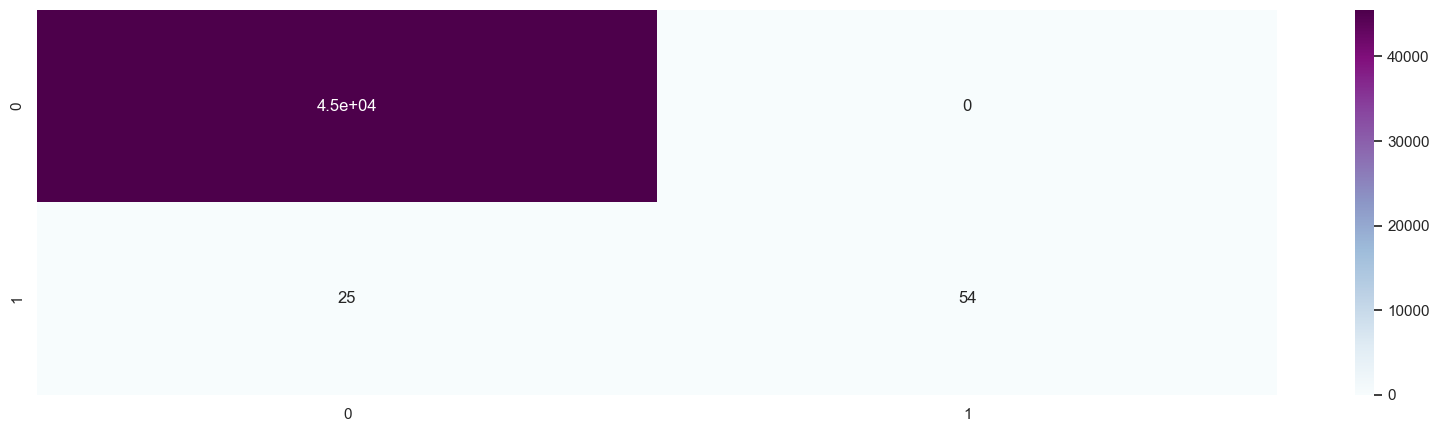

In [160]:
plt.figure(figsize = (20 , 5))
sns.heatmap(confusion_matrix(y_test , y_test_pred_vote) , annot = True , cmap = 'BuPu' , cbar = True)
plt.show()

### Classification_report on testing data

In [161]:
print(classification_report(y_test , y_test_pred_vote))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       1.00      0.68      0.81        79

    accuracy                           1.00     45569
   macro avg       1.00      0.84      0.91     45569
weighted avg       1.00      1.00      1.00     45569



#### AUC ROC Curve

In [162]:
roc_auc_score_test_vote = roc_auc_score(y_test , y_test_pred_vote)

In [163]:
roc_auc_score_test_vote

0.8417721518987342

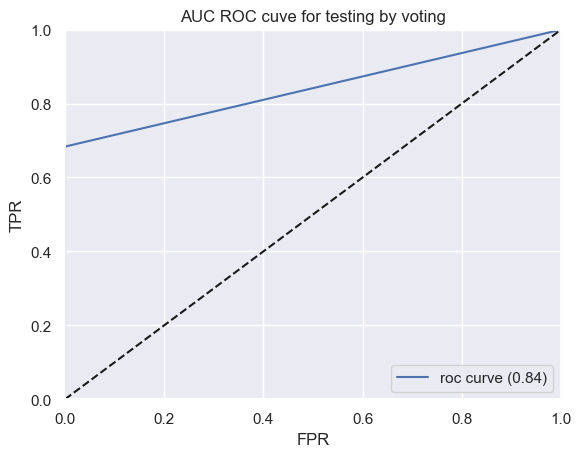

In [164]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_vote)

plt.plot(fpr , tpr , label = 'roc curve (%1.2f)'%roc_auc_score_test_vote)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve for testing by voting')
plt.legend(loc = 'lower right')
plt.show()

In [165]:
print('Training Accuracy of voting is :' , training_accuracy_vote)
print('Testing Accuracy of voting is :' , testing_accuracy_vote)

Training Accuracy of voting is : 0.9996543702955957
Testing Accuracy of voting is : 0.9994513814215804


## Accuracies of all models

In [166]:
Accuracy = pd.DataFrame({'Models' : ['LogisticRegression' ,'DecisionTree','RandomForest_Ginni','RandomForest_Entropy' , 'XGBoost' , 'SVM' , 'KNN' , 'Naive Bayes' , 'VotingClassifier' ] , 'Training Accuracy' : [training_accuracy_lr , training_accuracy_dt , training_accuracy_rf , training_accuracy_rf , training_accuracy_xg , training_accuracy_svm , training_accuracy_knn , training_accuracy_nb , training_accuracy_vote] , 'Testing Accuracy' : [testing_accuracy_lr , testing_accuracy_dt , testing_accuracy_rf , testing_accuracy_rf , testing_accuracy_xg  , testing_accuracy_svm , testing_accuracy_knn , testing_accuracy_nb , testing_accuracy_vote]})

In [167]:
Accuracy

,Models,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.999150,0.999210
1,DecisionTree,1.000000,0.999232
2,RandomForest_Ginni,1.000000,0.999561
3,RandomForest_Entropy,1.000000,0.999561
4,XGBoost,1.000000,0.999605
5,SVM,0.998694,0.998683
6,KNN,0.999534,0.999451
7,Naive Bayes,0.997301,0.997630
8,VotingClassifier,0.999654,0.999451


### Training Accuracy of all models

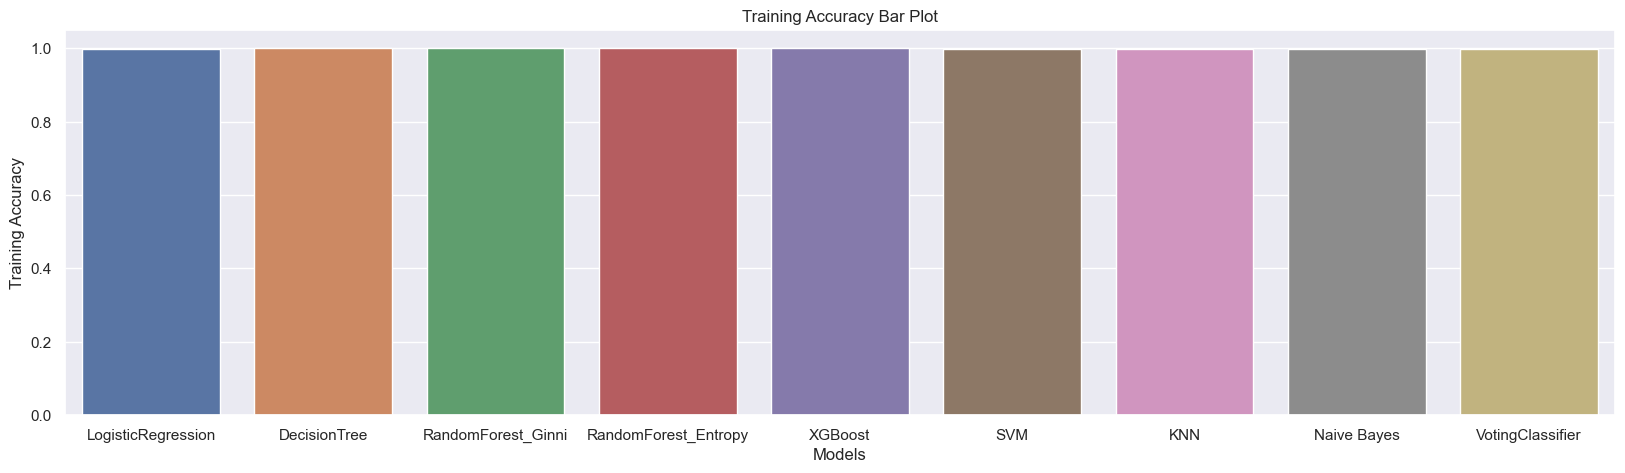

In [168]:
plt.figure(figsize = (20 , 5))
sns.barplot(data = Accuracy , x = 'Models' , y = 'Training Accuracy')
plt.title('Training Accuracy Bar Plot')
plt.show()

### Testing Accuracy of all models

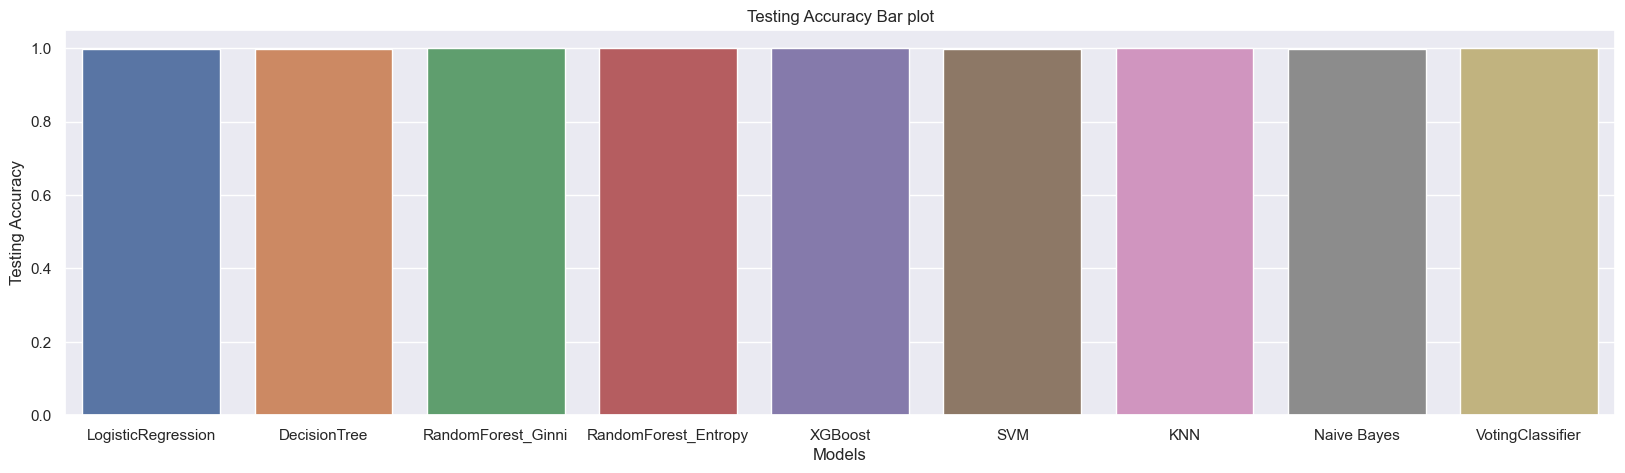

In [169]:
plt.figure(figsize = (20 , 5))
sns.barplot(data = Accuracy , x = 'Models' , y = 'Testing Accuracy')
plt.title('Testing Accuracy Bar plot')
plt.show()

## StackingClassifier

In [170]:
estimator1 = [('lr',lr) , ('svm' , svm) , ('knn' , knn)] 
#estimator = [('lr' , lr) ,('dt' , dt) , ('rf' , rf) , ('xg' , xg) , ('svm' , svm ), ('knn' , knn)] 

In [171]:
print(estimator1)

[('lr', LogisticRegression()), ('svm', SVC()), ('knn', KNeighborsClassifier())]


In [172]:
stack = StackingClassifier(estimators = estimator1,final_estimator=LogisticRegression(),cv=10)

In [173]:
stack

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

#### Fit the stacking model

In [174]:
stack.fit(x_train_array , y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [175]:
stack

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

#### Training Prediction of stacking

In [176]:
y_train_pred_stack = stack.predict(x_train_array)

In [177]:
print(y_train_pred_stack)

[0. 0. 0. ... 0. 0. 0.]


#### Training Accuracy of stacking

In [178]:
training_accuracy_stack = accuracy_score(y_train , y_train_pred_stack)

In [179]:
training_accuracy_stack

0.9994788123505014

#### Confusion Matrix on  training model

In [180]:
cm_train_stack = confusion_matrix(y_train , y_train_pred_stack)

In [181]:
cm_train_stack

array([[181949,     12],
       [    83,    232]], dtype=int64)

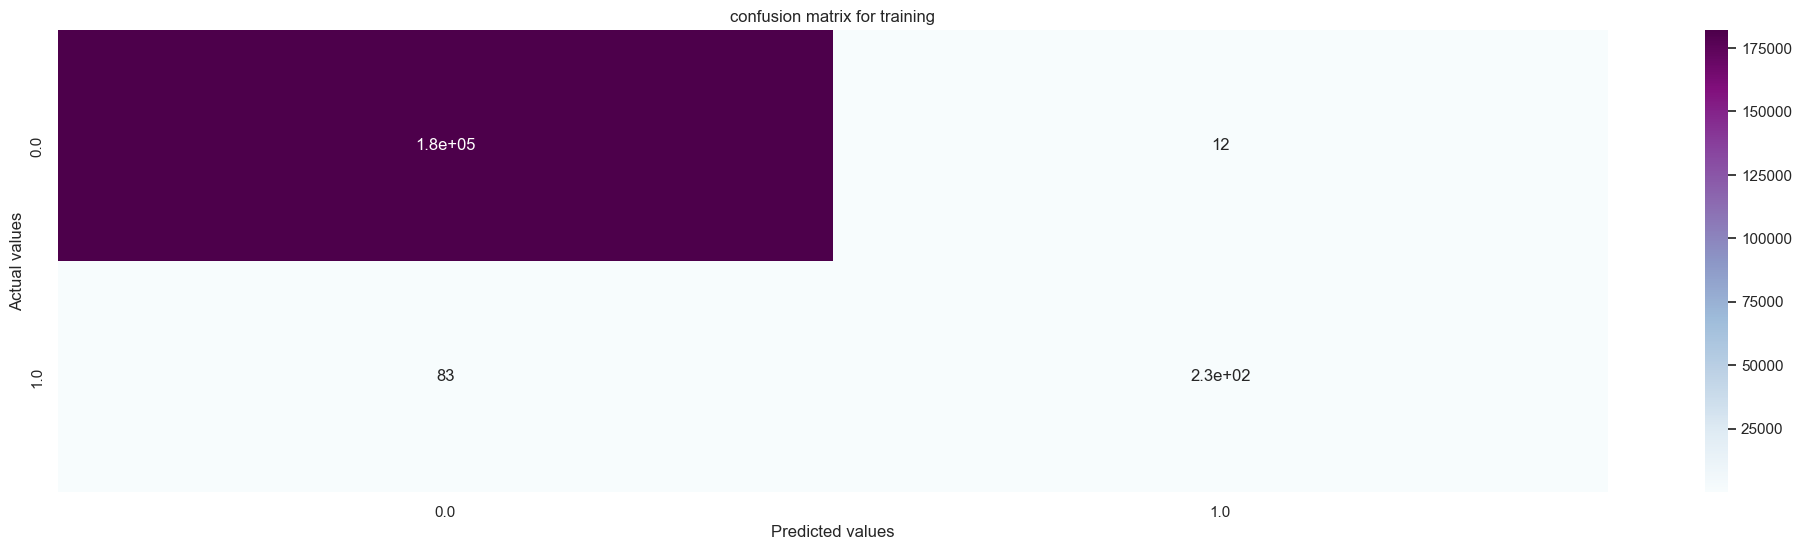

In [182]:
plt.figure(figsize = (25 , 6))
sns.heatmap(cm_train_stack , annot = True , cbar = True , cmap = 'BuPu' , xticklabels = y.value_counts().index , yticklabels = y.value_counts().index)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for training')
plt.show()

#### Classification report on training data

In [183]:
print(classification_report(y_train  , y_train_pred_stack))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.95      0.74      0.83       315

    accuracy                           1.00    182276
   macro avg       0.98      0.87      0.91    182276
weighted avg       1.00      1.00      1.00    182276



#### ROC AUC curve on training model

In [184]:
roc_auc_score_train_stack = roc_auc_score(y_train , y_train_pred_stack)

In [185]:
roc_auc_score_train_stack

0.868220994155123

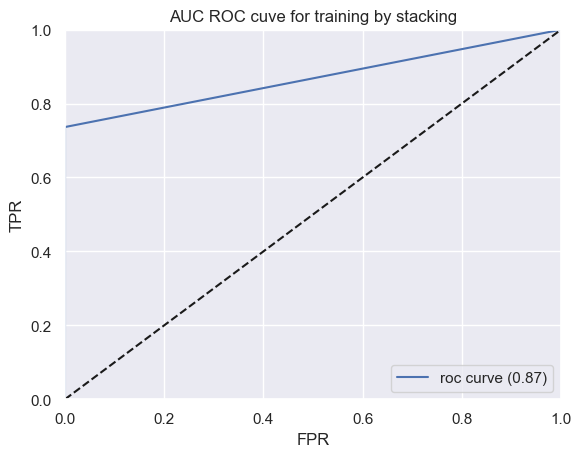

In [186]:
fpr , tpr , threshold = roc_curve(y_train , y_train_pred_stack)

plt.plot(fpr , tpr , label = 'roc curve (%1.2f)'%roc_auc_score_train_stack)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve for training by stacking')
plt.legend(loc = 'lower right')
plt.show()

#### Testing model of stacking

In [187]:
x_test_array = x_test.values

In [188]:
y_test_pred_stack = stack.predict(x_test_array)

In [189]:
print(y_test_pred_stack)

[0. 0. 0. ... 0. 0. 0.]


##### Testing Accuracy on stacking

In [190]:
testing_accuracy_stack = accuracy_score(y_test , y_test_pred_stack)

In [191]:
testing_accuracy_stack

0.9993636024490333

#### confusion matrix on testing data

In [192]:
cm_test_stack = confusion_matrix(y_test , y_test_pred_stack)

In [193]:
cm_test_stack

array([[45490,     0],
       [   29,    50]], dtype=int64)

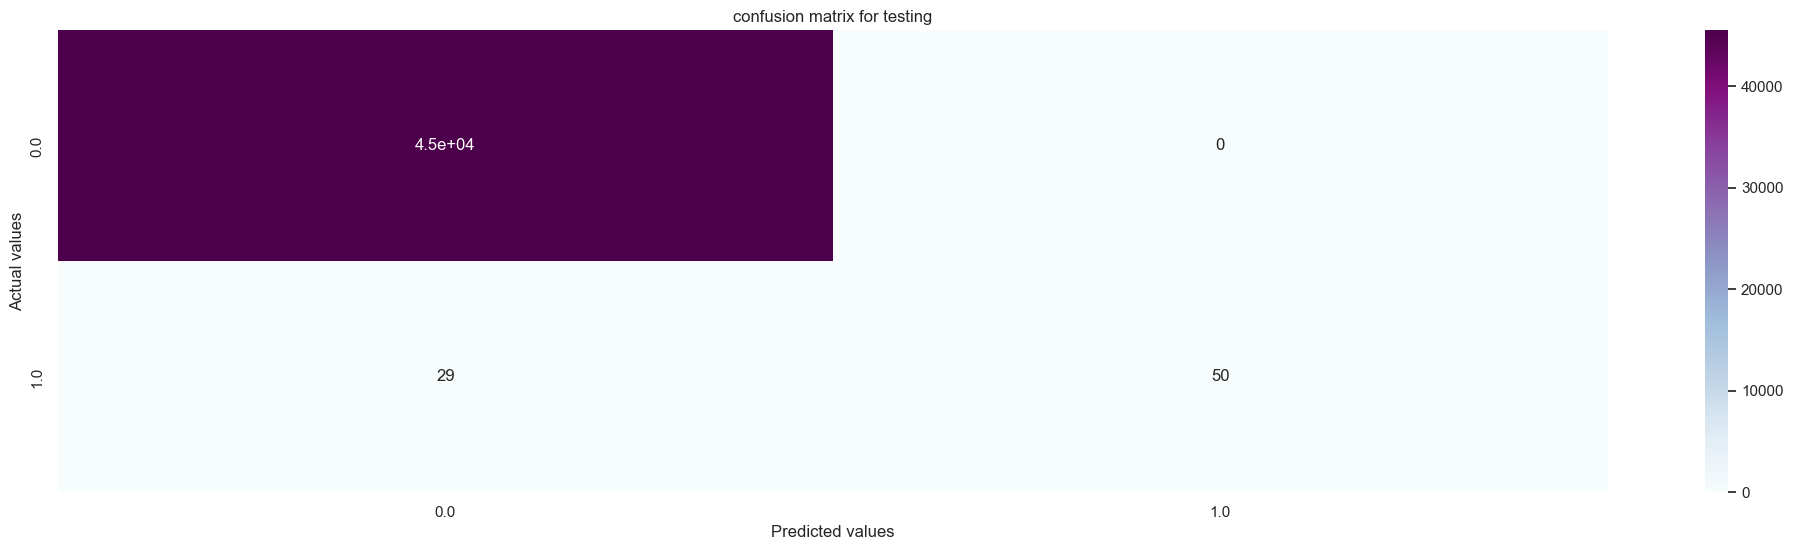

In [194]:
plt.figure(figsize = (25 , 6))
sns.heatmap(cm_test_stack , annot = True , cbar = True , cmap = 'BuPu' , xticklabels = y.value_counts().index , yticklabels = y.value_counts().index)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for testing')
plt.show()

#### Classification report on testing data

In [195]:
print(classification_report(y_test , y_test_pred_stack))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       1.00      0.63      0.78        79

    accuracy                           1.00     45569
   macro avg       1.00      0.82      0.89     45569
weighted avg       1.00      1.00      1.00     45569



#### ROC AUC Curve on testing data of stacking

In [196]:
roc_auc_score_test_stack = roc_auc_score(y_test , y_test_pred_stack)

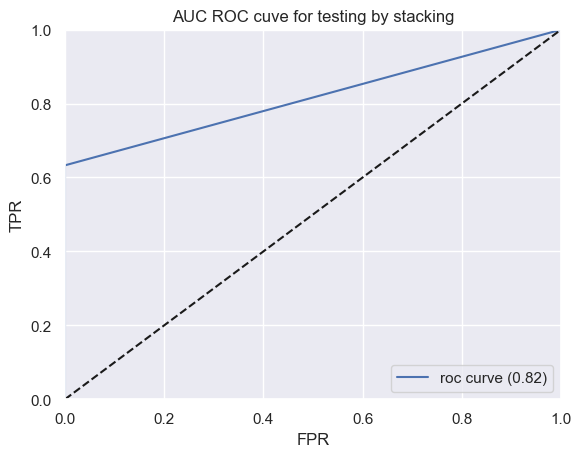

In [197]:
fpr , tpr , threshold = roc_curve(y_test , y_test_pred_stack)

plt.plot(fpr , tpr , label = 'roc curve (%1.2f)'%roc_auc_score_test_stack)
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0  , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC ROC cuve for testing by stacking')
plt.legend(loc = 'lower right')
plt.show()

## Accuracies of stacking

In [198]:
print('Training Accuracy of stacking is :' , training_accuracy_stack)
print('Testing Accuracy of stacking is :' , testing_accuracy_stack)

Training Accuracy of stacking is : 0.9994788123505014
Testing Accuracy of stacking is : 0.9993636024490333


# Anamoly Detection 

##### Anamoly Detection is detect anamolies from data(x_train , y_train) and make isolate them and treated as outliers and build the anamoly detection algorithms like isolation forest , oneclasssvm

##### Anamoly Detection is not using everywhere its domain specialization model so we can use when data is fraudalant or when we want find fraudalant data as well transactions or in ecommerce domain also.

## ISolationForest

In [199]:
outlier_fraction

0.001729245759178389

##### We need to pass percentage of fraudalant data to anamoly detection algorithm.if this information is not there u can take 20 % data of contamination

In [200]:
isolation = IsolationForest(n_estimators=100,
    contamination=outlier_fraction)

In [201]:
isolation

IsolationForest(contamination=0.001729245759178389)

In [202]:
isolation.fit(x_train , y_train)
y_train_pred_isolation = isolation.predict(x_train)
y_test_pred_isolation = isolation.predict(x_test)

training_accuracy_isolation = accuracy_score(y_train , y_train_pred_isolation)
testing_accuracy_isolation = accuracy_score(y_test , y_test_pred_isolation)

print('Training Accuracy Isolation :' , training_accuracy_isolation)
print('Testing Accuracy Isolation :' , testing_accuracy_isolation)

cm_train_isolation = confusion_matrix(y_train , y_train_pred_isolation)
print('Training Isolation confusion matrix :' ,)

print(cm_train_isolation)

cm_test_isolation = confusion_matrix(y_test , y_test_pred_isolation)
print('Testing Isolation confusion matrix :',)
print(cm_test_isolation)

print('classification Report of training :',)
print(classification_report(y_train , y_train_pred_isolation))

print('Classification Report of testing :' ,)
print(classification_report(y_test , y_test_pred_isolation))

Training Accuracy Isolation : 0.0012014746867387918
Testing Accuracy Isolation : 0.0012947398450701135
Training Isolation confusion matrix :
[[     0      0      0]
 [   220      0 181741]
 [    96      0    219]]
Testing Isolation confusion matrix :
[[    0     0     0]
 [   51     0 45439]
 [   20     0    59]]
classification Report of training :
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181961
         1.0       0.00      0.70      0.00       315

    accuracy                           0.00    182276
   macro avg       0.00      0.23      0.00    182276
weighted avg       0.00      0.00      0.00    182276

Classification Report of testing :
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45490
         1.0       0.00      0.75      0.00        79

    accuracy   

In [203]:
print('Training Accuracy Isolation :' , training_accuracy_isolation)
print('Testing Accuracy Isolation :' , testing_accuracy_isolation)

Training Accuracy Isolation : 0.0012014746867387918
Testing Accuracy Isolation : 0.0012947398450701135


#### Anamoly Detection Algorithm gives outliers part or outliers percentage

## Detecting fruad data in which columns

#### train data

##### Here we detected anamoly or fraud data in perticular columns like we get fraud value in per1 , dem1 , cred1 ,geo_score , lambda_wt

In [204]:
for i , q in enumerate(x_train):
    
    if y_train_pred_isolation[i] == 1.0:
        
        print(f'Anamoly Detected : {q}')
        
    else:
        
        print(f'Normal Transaction :{q}')

Anamoly Detected : Per1
Anamoly Detected : Per2
Anamoly Detected : Per3
Anamoly Detected : Per4
Anamoly Detected : Per5
Anamoly Detected : Per6
Anamoly Detected : Per7
Anamoly Detected : Per8
Anamoly Detected : Per9
Anamoly Detected : Dem1
Anamoly Detected : Dem2
Anamoly Detected : Dem3
Anamoly Detected : Dem4
Anamoly Detected : Dem5
Anamoly Detected : Dem6
Anamoly Detected : Dem7
Anamoly Detected : Dem8
Anamoly Detected : Dem9
Anamoly Detected : Cred1
Anamoly Detected : Cred2
Anamoly Detected : Cred3
Anamoly Detected : Cred4
Anamoly Detected : Cred5
Anamoly Detected : Cred6
Anamoly Detected : Normalised_FNT
Anamoly Detected : geo_score
Anamoly Detected : instance_scores
Anamoly Detected : qsets_normalized_tat
Anamoly Detected : lambda_wt


##### Test data

####  we detected anamoly or fraud data in perticular columns like we get fraud value in per1 , dem1 , cred1 ,geo_score , lambda_wt

In [205]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [206]:
for i , q in enumerate(x_test):
    
    if(y_test_pred_isolation[i]) == 1.0:
        
        print(f'Anamoly Detected : {q}')
        
    else:
        
        print(f'Normal Transaction : {q}')

Anamoly Detected : Per1
Anamoly Detected : Per2
Anamoly Detected : Per3
Anamoly Detected : Per4
Anamoly Detected : Per5
Anamoly Detected : Per6
Anamoly Detected : Per7
Anamoly Detected : Per8
Anamoly Detected : Per9
Anamoly Detected : Dem1
Anamoly Detected : Dem2
Anamoly Detected : Dem3
Anamoly Detected : Dem4
Anamoly Detected : Dem5
Anamoly Detected : Dem6
Anamoly Detected : Dem7
Anamoly Detected : Dem8
Anamoly Detected : Dem9
Anamoly Detected : Cred1
Anamoly Detected : Cred2
Anamoly Detected : Cred3
Anamoly Detected : Cred4
Anamoly Detected : Cred5
Anamoly Detected : Cred6
Anamoly Detected : Normalised_FNT
Anamoly Detected : geo_score
Anamoly Detected : instance_scores
Anamoly Detected : qsets_normalized_tat
Anamoly Detected : lambda_wt


#### Insights : Here we get some columns which having fraudulant transactions or fraudalant data

### Till now we just detect the fraud data by algorithms in anamoly detection. now we build the anamoly detection algorithm

In [207]:
final_classification_model = {'IsolationForest' : IsolationForest(contamination=outlier_fraction,max_samples = len(x)) , 
                             'Local Outlier Factor' : LocalOutlierFactor(contamination= outlier_fraction),
                              'OneClasssSVM' : OneClassSVM()}

In [208]:
final_classification_model

{'IsolationForest': IsolationForest(contamination=0.001729245759178389, max_samples=227845),
 'Local Outlier Factor': LocalOutlierFactor(contamination=0.001729245759178389),
 'OneClasssSVM': OneClassSVM()}

####  normal data and fraud data

In [209]:
fraud = train[train['Target'] == 1.0]
normal = train[train['Target'] == 0.0]

In [210]:
total_outlier_found = len(fraud)

In [211]:
total_outlier_found

394

In [212]:
final_classification_model

{'IsolationForest': IsolationForest(contamination=0.001729245759178389, max_samples=227845),
 'Local Outlier Factor': LocalOutlierFactor(contamination=0.001729245759178389),
 'OneClasssSVM': OneClassSVM()}

## Isolation Forest

#### Here we calculating what is actual count of fraud values we get by IsolationForest Model

In [213]:
iso = IsolationForest(n_estimators=100,
    contamination=outlier_fraction,)

In [214]:
iso

IsolationForest(contamination=0.001729245759178389)

In [215]:
iso.fit(x_train)

IsolationForest(contamination=0.001729245759178389)

In [216]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

### Training Model of Isolation Forest

In [217]:
y_pred_train_iso = iso.predict(x_train)
score_prediction_train = iso.decision_function(x_train)
print(f' Score Prediction train : {score_prediction_train}')
y_pred_train_iso[y_pred_train_iso == 1] = 0
y_pred_train_iso[y_pred_train_iso == -1] = 1
n_error = (y_pred_train_iso!=y_train).sum()
print(f' no of outliers in training data  : {n_error}')

print(f' Training Accuracy of Isolation Forest   : {accuracy_score(y_train , y_pred_train_iso)}')

 Score Prediction train : [0.23560848 0.24088393 0.24035556 ... 0.17236648 0.24699232 0.29215892]
 no of outliers in training data  : 475
 Training Accuracy of Isolation Forest   : 0.9973940617525072


### Testing Model of Isolation Forest

In [218]:
y_pred_test_iso = iso.predict(x_test)
score_prediction_test = iso.decision_function(x_test)
print(f' Score Prediction test : {score_prediction_test}')
y_pred_test_iso[y_pred_test_iso == 1] = 0
y_pred_test_iso[y_pred_test_iso == -1] = 1
n_error = (y_pred_test_iso!=y_test).sum()
print(f' no of outliers in testing data :{n_error}')
print(f'Testing Accuracy of Isolation Forest : {accuracy_score(y_test , y_pred_test_iso)}')

 Score Prediction test : [0.21106443 0.29262095 0.28590179 ... 0.28230553 0.23791746 0.29204381]
 no of outliers in testing data :124
Testing Accuracy of Isolation Forest : 0.997278851851039


# OneClassSVM

In [219]:
one = OneClassSVM()

In [220]:
one

OneClassSVM()

#### Fit the oneclasssvm model

In [221]:
one.fit(x_train , y_train)

OneClassSVM()

### Training Model of oneclasssvm

In [222]:
y_train_pred_one = one.predict(x_train)
y_train_pred_one[y_train_pred_one == 1] = 0
y_train_pred_one[y_train_pred_one == -1] = 1
n_error = (y_train != y_train_pred_one).sum()
print(f'No of outliers in oneclasssvm training data : {n_error}')
print(f'Training Accuracy of oneclasssvm :  {accuracy_score(y_train , y_train_pred_one)}')

No of outliers in oneclasssvm training data : 90907
Training Accuracy of oneclasssvm :  0.5012673089161491


### Testing Model of oneclasssvm

In [223]:
y_test_pred_one = one.predict(x_test)
y_test_pred_one[y_test_pred_one == 1] = 0
y_test_pred_one[y_test_pred_one == -1] = 1
n_error = (y_test != y_test_pred_one).sum()
print(f'No of outliers in oneclasssvm testing data : {n_error}')
print(f'Testing Accuracy of oneclasssvm : {accuracy_score(y_test , y_test_pred_one)}')

No of outliers in oneclasssvm testing data : 22960
Testing Accuracy of oneclasssvm : 0.4961486975794948


## LocalOutlierFactor

In [224]:
local = LocalOutlierFactor()

### Training model on localoutlierfactor

In [225]:
y_train_pred_local = local.fit_predict(x_train)
score_prediction_train = local.negative_outlier_factor_
print(f'score prediction train : {score_prediction_train}')
y_train_pred_local[y_train_pred_local == 1] = 0
y_train_pred_local[y_train_pred_local == -1] = 1
n_error = (y_train != y_train_pred_local).sum()
print(f'no of outlier in localoutlierfactor in training data : {n_error}')
print(f'Training Accuracy on localoutlierfactor : {accuracy_score(y_train , y_train_pred_local)}')

score prediction train : [-1.09278676 -1.25966511 -1.04207336 ... -0.99289163 -1.1837157
 -0.97657697]
no of outlier in localoutlierfactor in training data : 6971
Training Accuracy on localoutlierfactor : 0.9617557988983739


### Testing Model on localoutlierfactor

In [226]:
y_test_pred_local = local.fit_predict(x_test)
score_prediction_test = local.negative_outlier_factor_
print(f'score prediction test : {score_prediction_test}')
y_test_pred_local[y_test_pred_local == 1] = 0
y_test_pred_local[y_test_pred_local == -1] = 1
n_error = (y_test != y_test_pred_local).sum()
print(f'no of outlier in localoutlierfactor in testing data : {n_error}')
print(f'Testing Accuracy on localoutlierfactor : {accuracy_score(y_test , y_test_pred_local)}')

score prediction test : [-1.3544524  -1.08353926 -1.08439106 ... -1.00320809 -0.9953627
 -0.98430303]
no of outlier in localoutlierfactor in testing data : 1606
Testing Accuracy on localoutlierfactor : 0.9647567425223288
